# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

The client has created a new landing page and they want to see if this improves the results of thier web page. This will be evaluated by:
1. Do users spend more time on the landing page?
2. Does the new landing page improve the conversion rate? 
3. Does the users preferred language effectg page performance? 
4. Do users preferring different languages effect time on page?

## Import all the necessary libraries

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv') # reading in the dataset

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Reviewing the first 5 rows of the data fram

In [3]:
df.head() # Using the df.head command to ensure data loaded correctly and first look at data first few rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Reviewing the last 5 rows of the data fram

In [4]:
df.tail() # last few row

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Reviewing the data types and an initial look for any null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Change the type of the "user_id" field to keep out of numerical calculations

In [6]:
df['user_id'] = df['user_id'].astype(object)

In [7]:
df.info() # ensure the user_id is now an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    object 
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


#### Basic statistics for the one numeric field

In [8]:
summary = df.describe().T # Review the numerical field data range
summary = summary.round(2)
print(summary)

                        count  mean   std   min   25%   50%   75%    max
time_spent_on_the_page  100.0  5.38  2.38  0.19  3.88  5.42  7.02  10.71


#### Checking for duplicate rows - None found

In [9]:
duplicates = len(df[df.duplicated()])
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


### Univariate Analysis

#### Categorical Variables
A quick look at the categorical variables

In [10]:
group_counts = df['group'].value_counts()
print(group_counts)
print()
page_counts = df['landing_page'].value_counts()
print(page_counts)
print()
con_counts = df['converted'].value_counts()
print(con_counts)
print()
lang_counts = df['language_preferred'].value_counts()
print(lang_counts)

group
control      50
treatment    50
Name: count, dtype: int64

landing_page
old    50
new    50
Name: count, dtype: int64

converted
yes    54
no     46
Name: count, dtype: int64

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


#### Numerical Variable

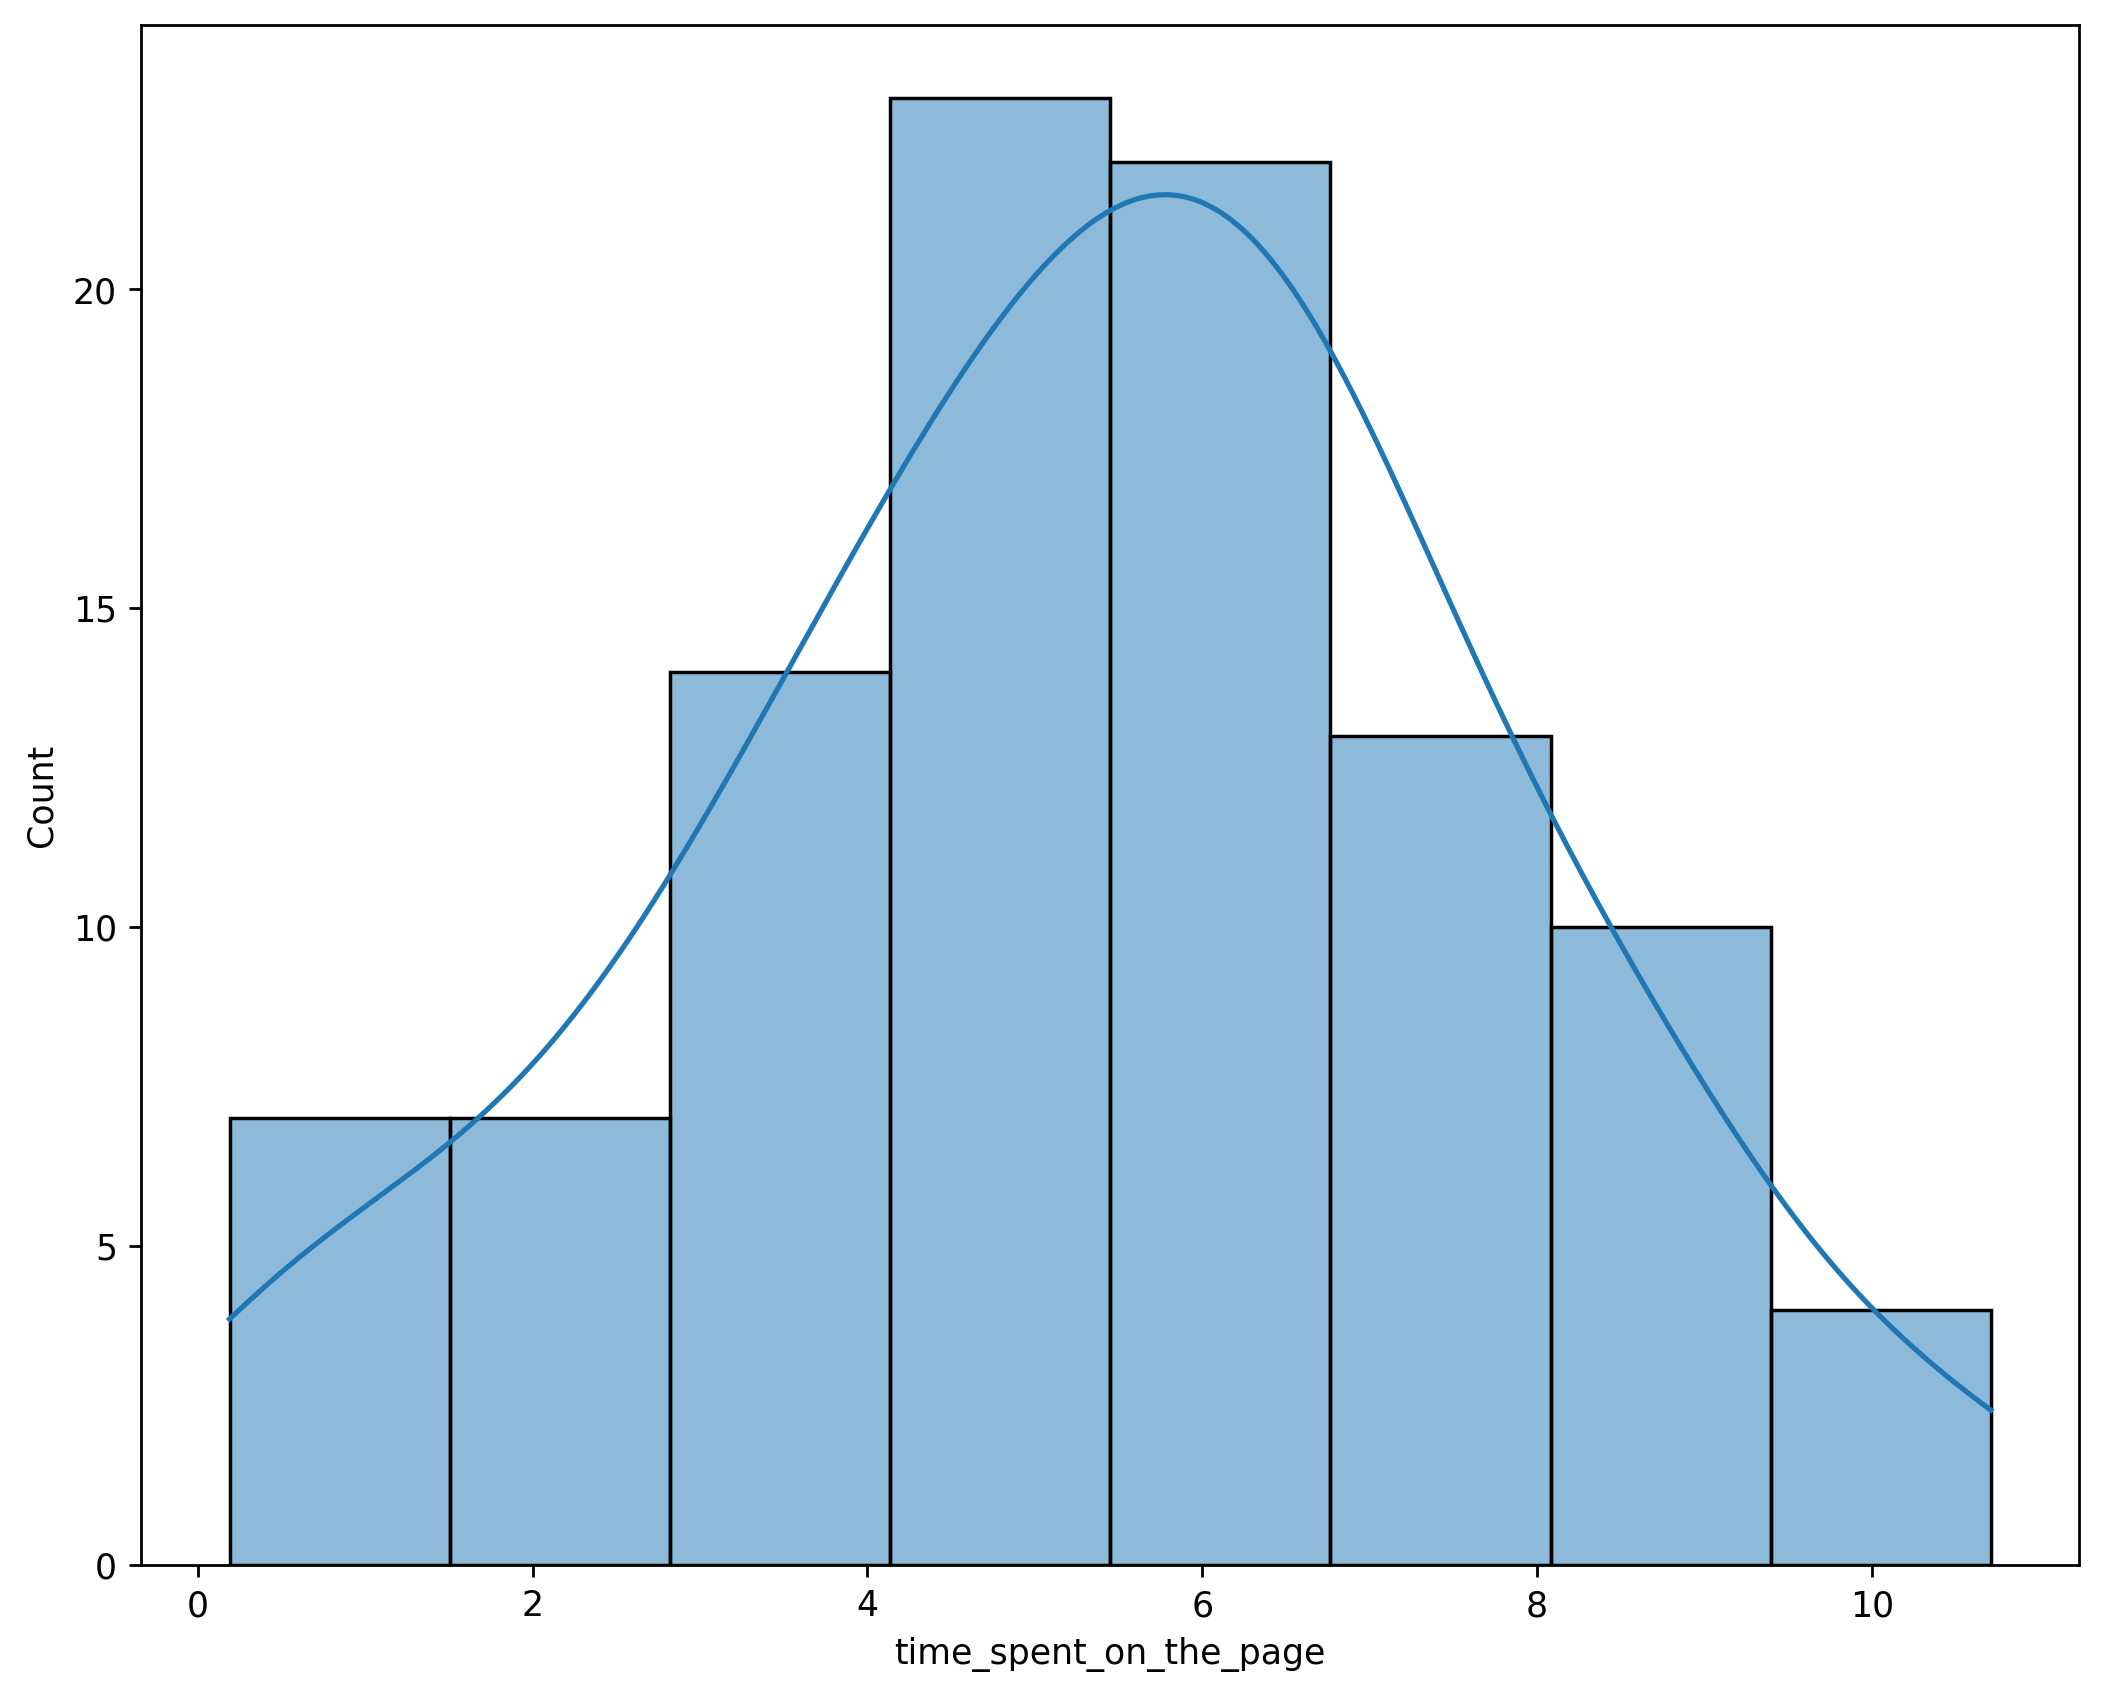

In [11]:
plt.figure(figsize=(10,8), dpi=250)
sns.histplot(data=df, x='time_spent_on_the_page', kde=True);

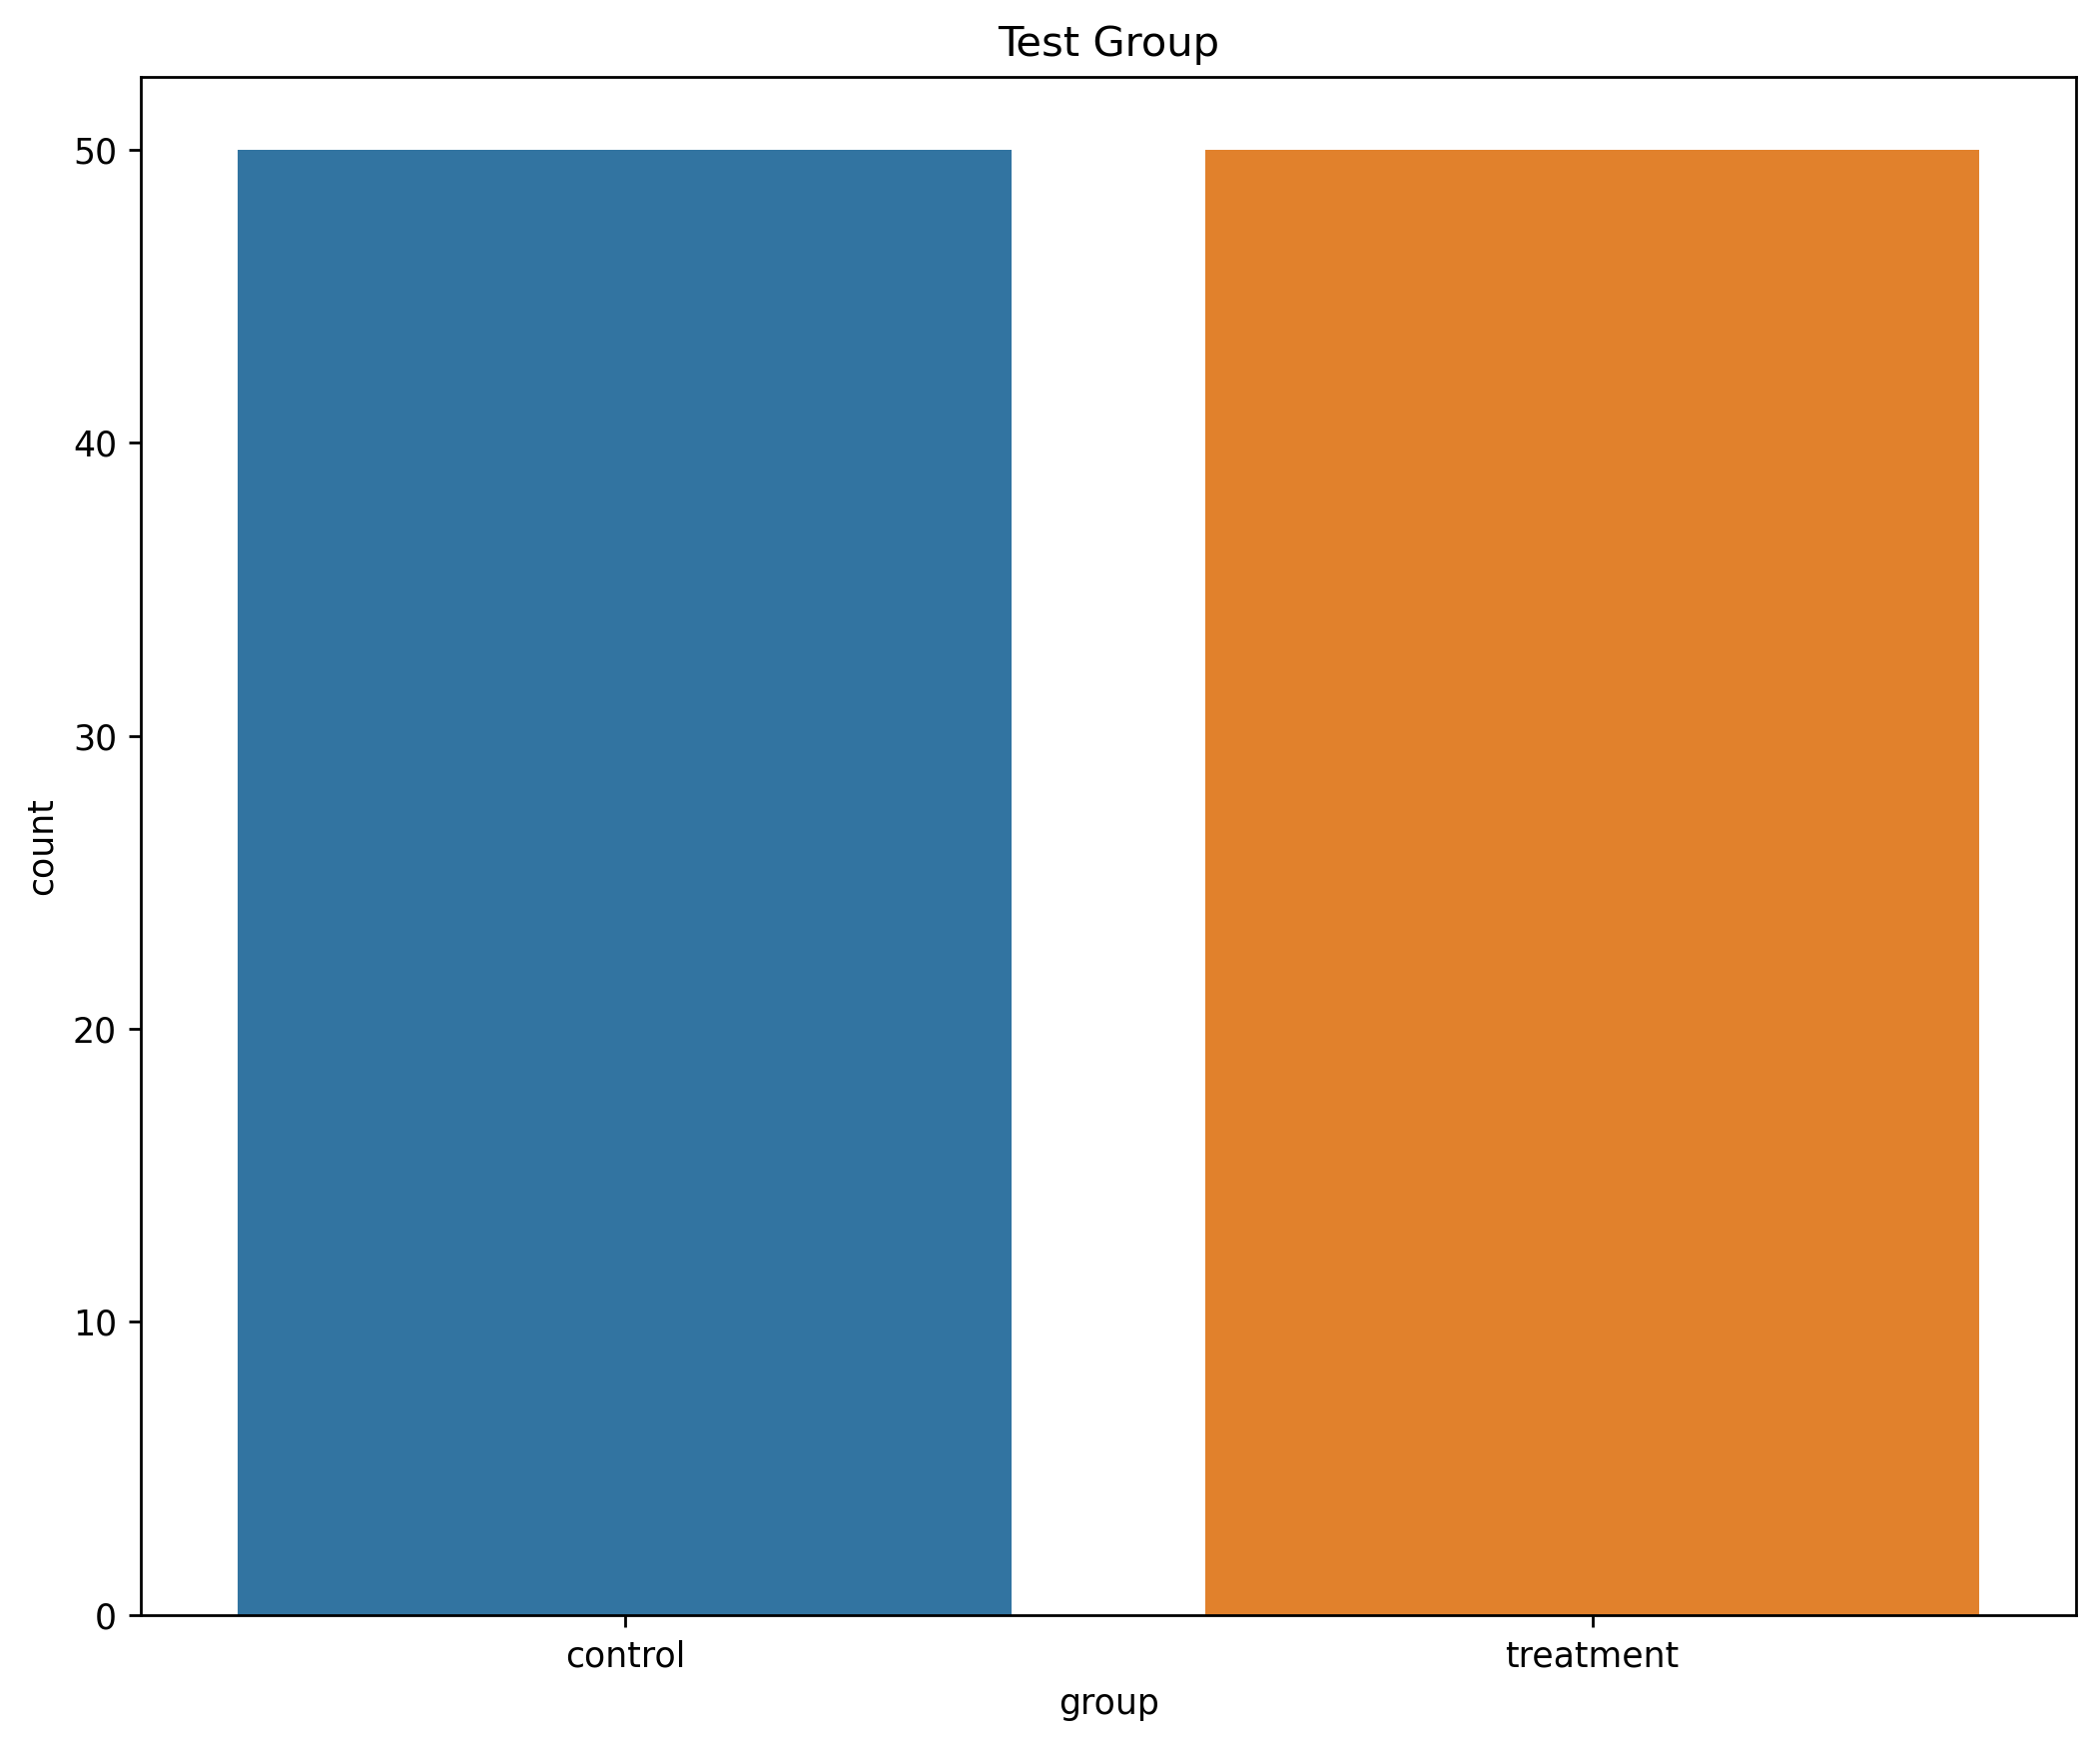

In [12]:
plt.figure(figsize=(10,8), dpi=250)
plt.title('Test Group')
sns.countplot(data=df, x='group');

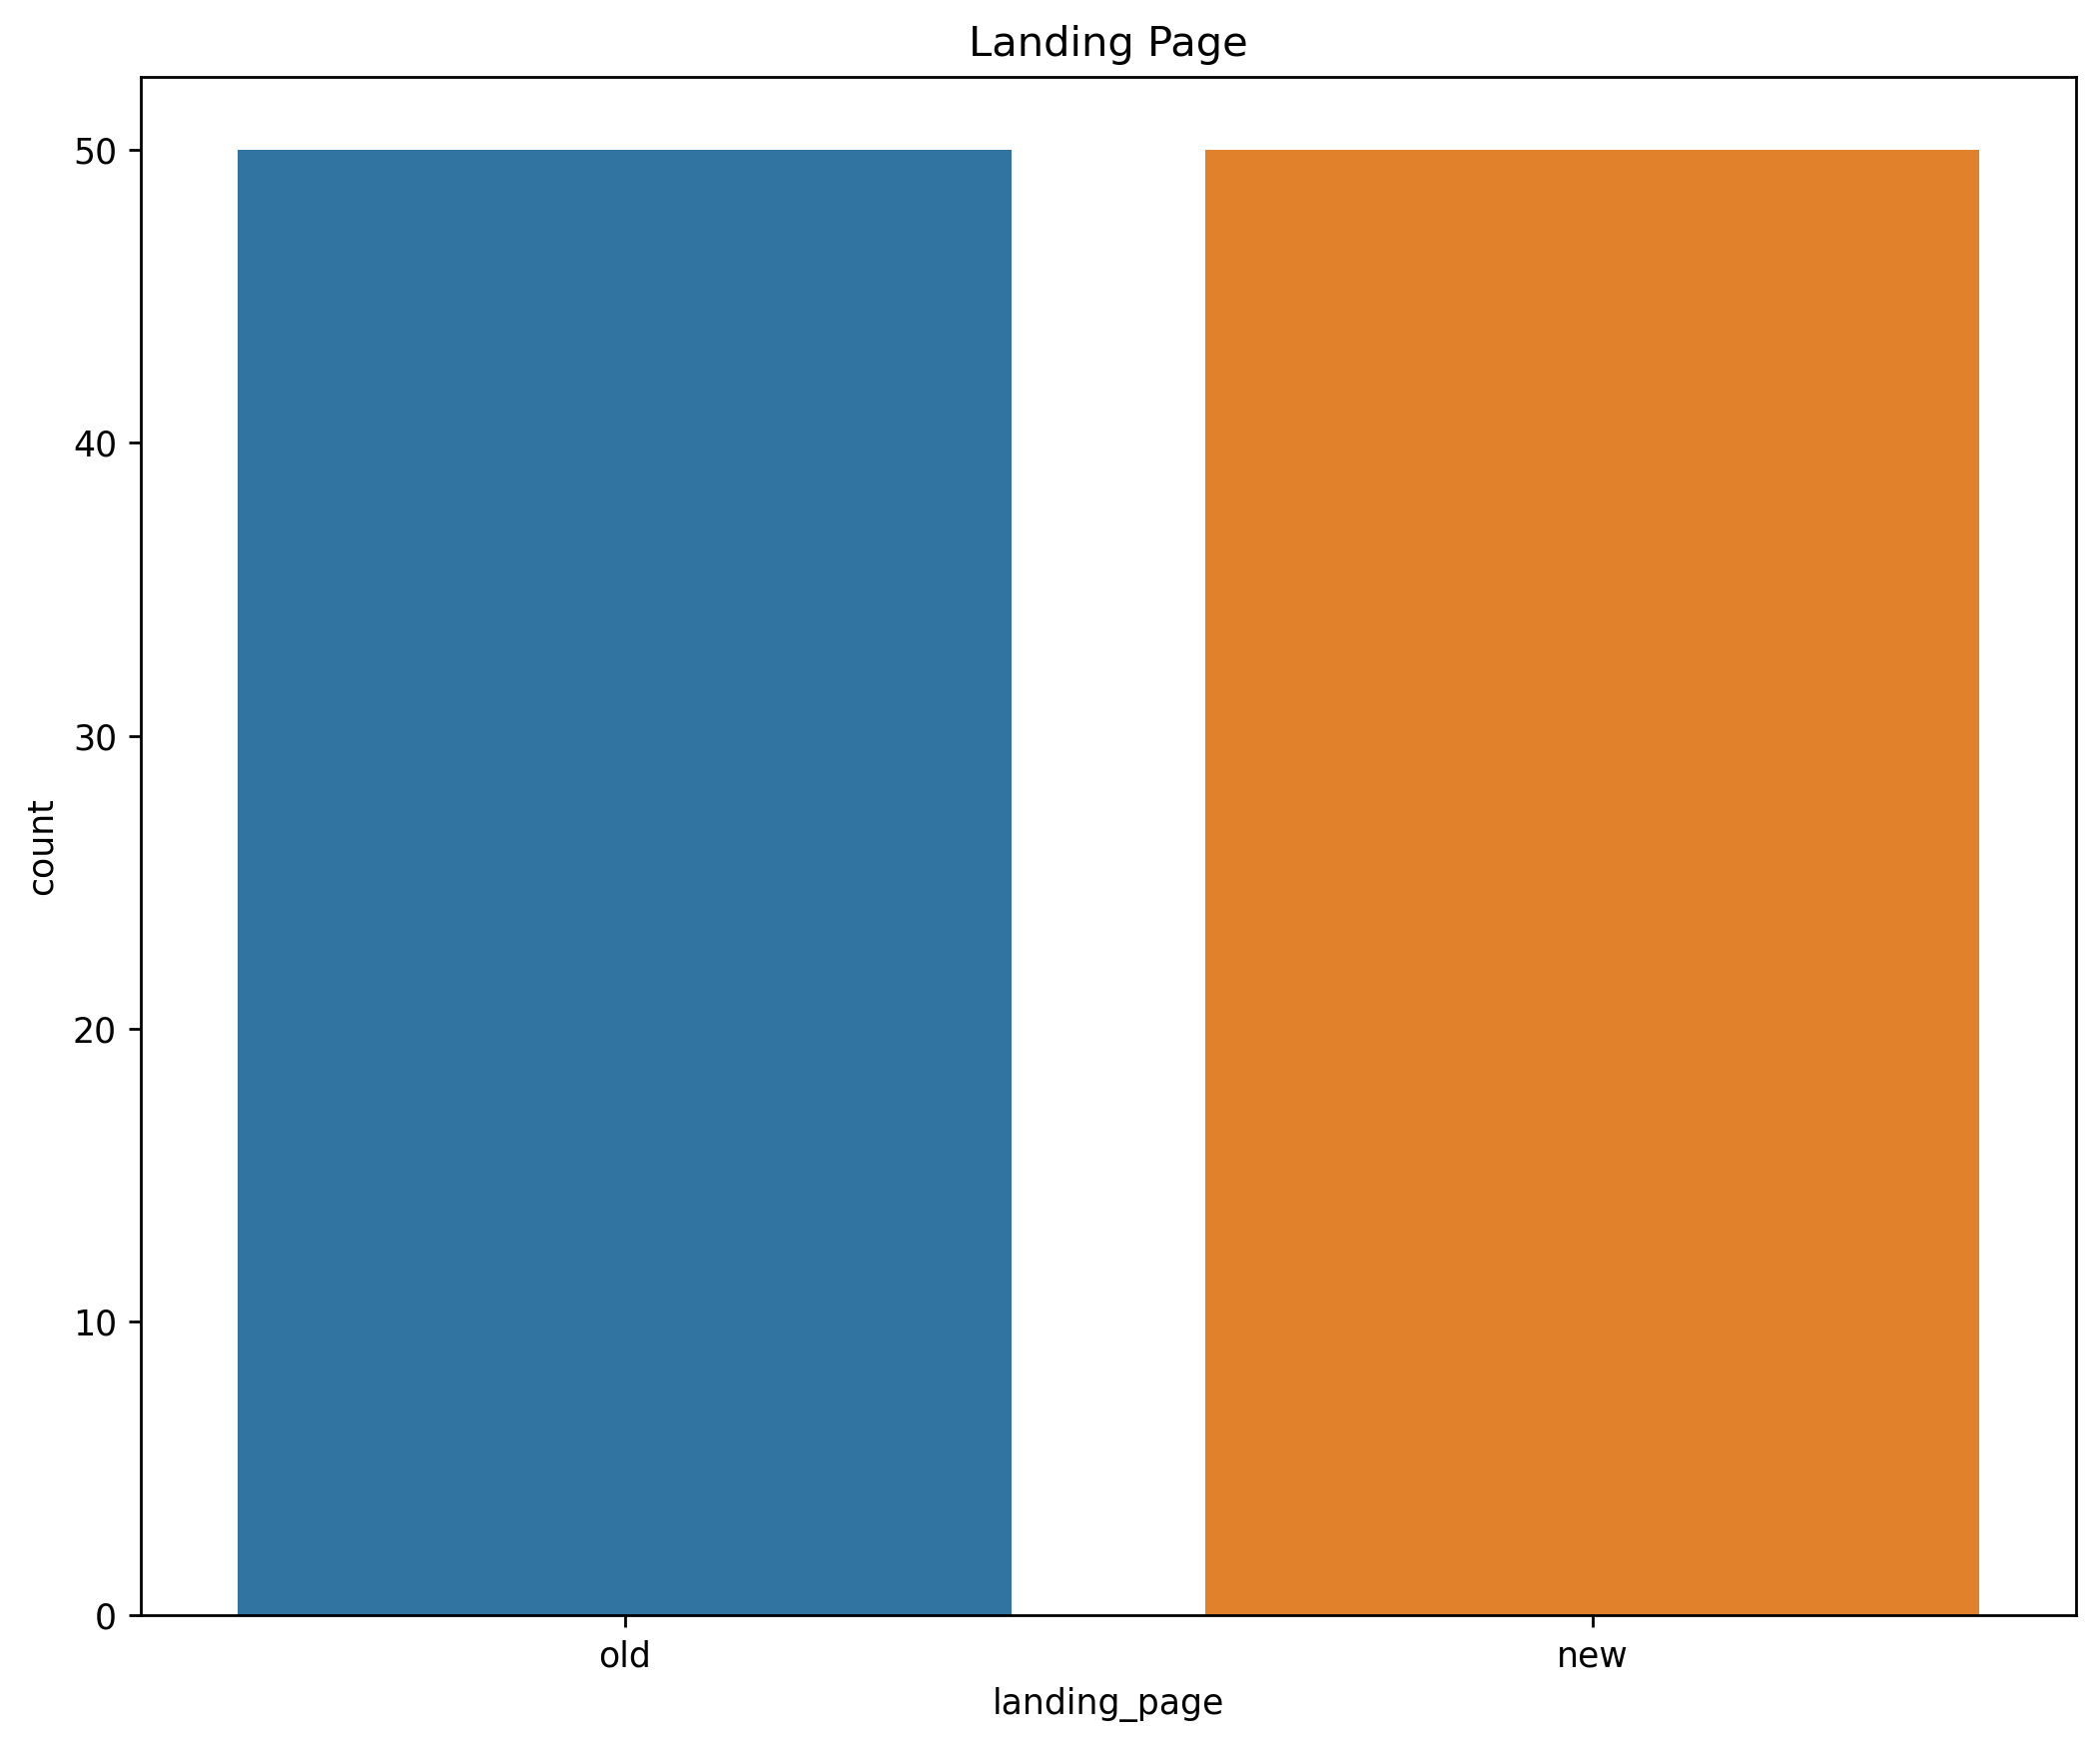

In [13]:
plt.figure(figsize=(10,8), dpi=250)
plt.title('Landing Page')
sns.countplot(data=df, x='landing_page');

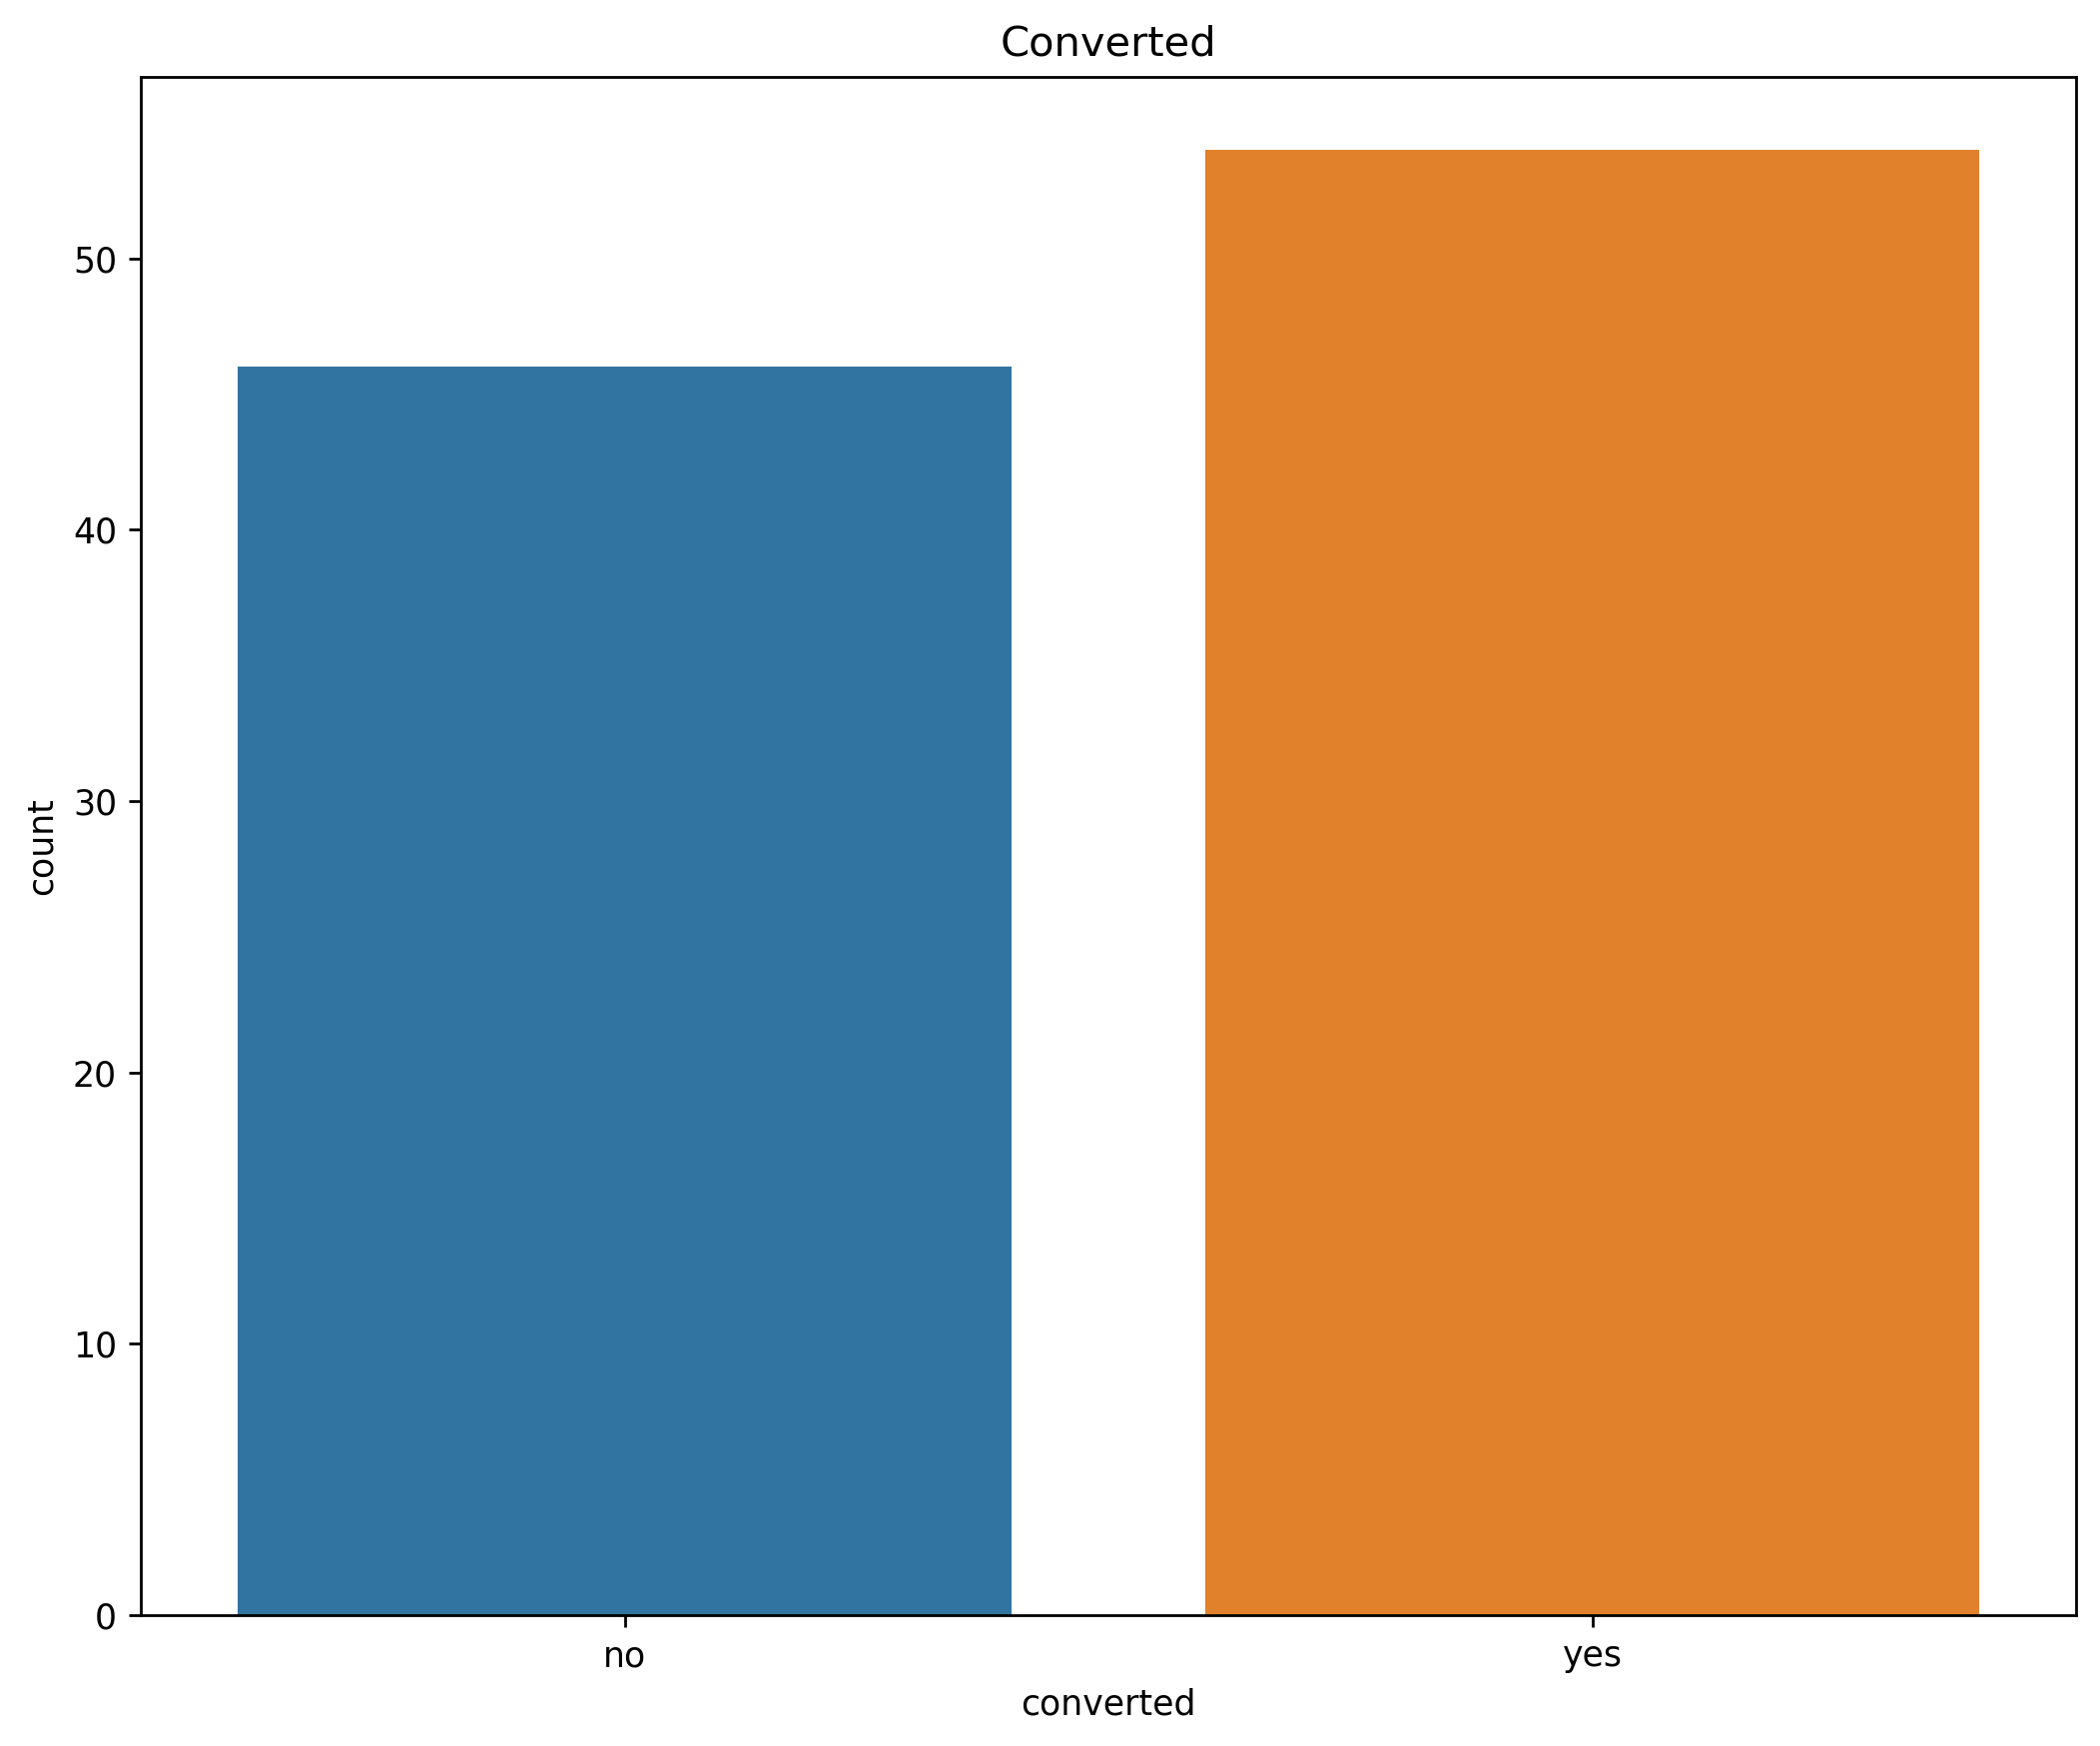

In [14]:
plt.figure(figsize=(10,8), dpi=250)
plt.title('Converted')
sns.countplot(data=df, x='converted');

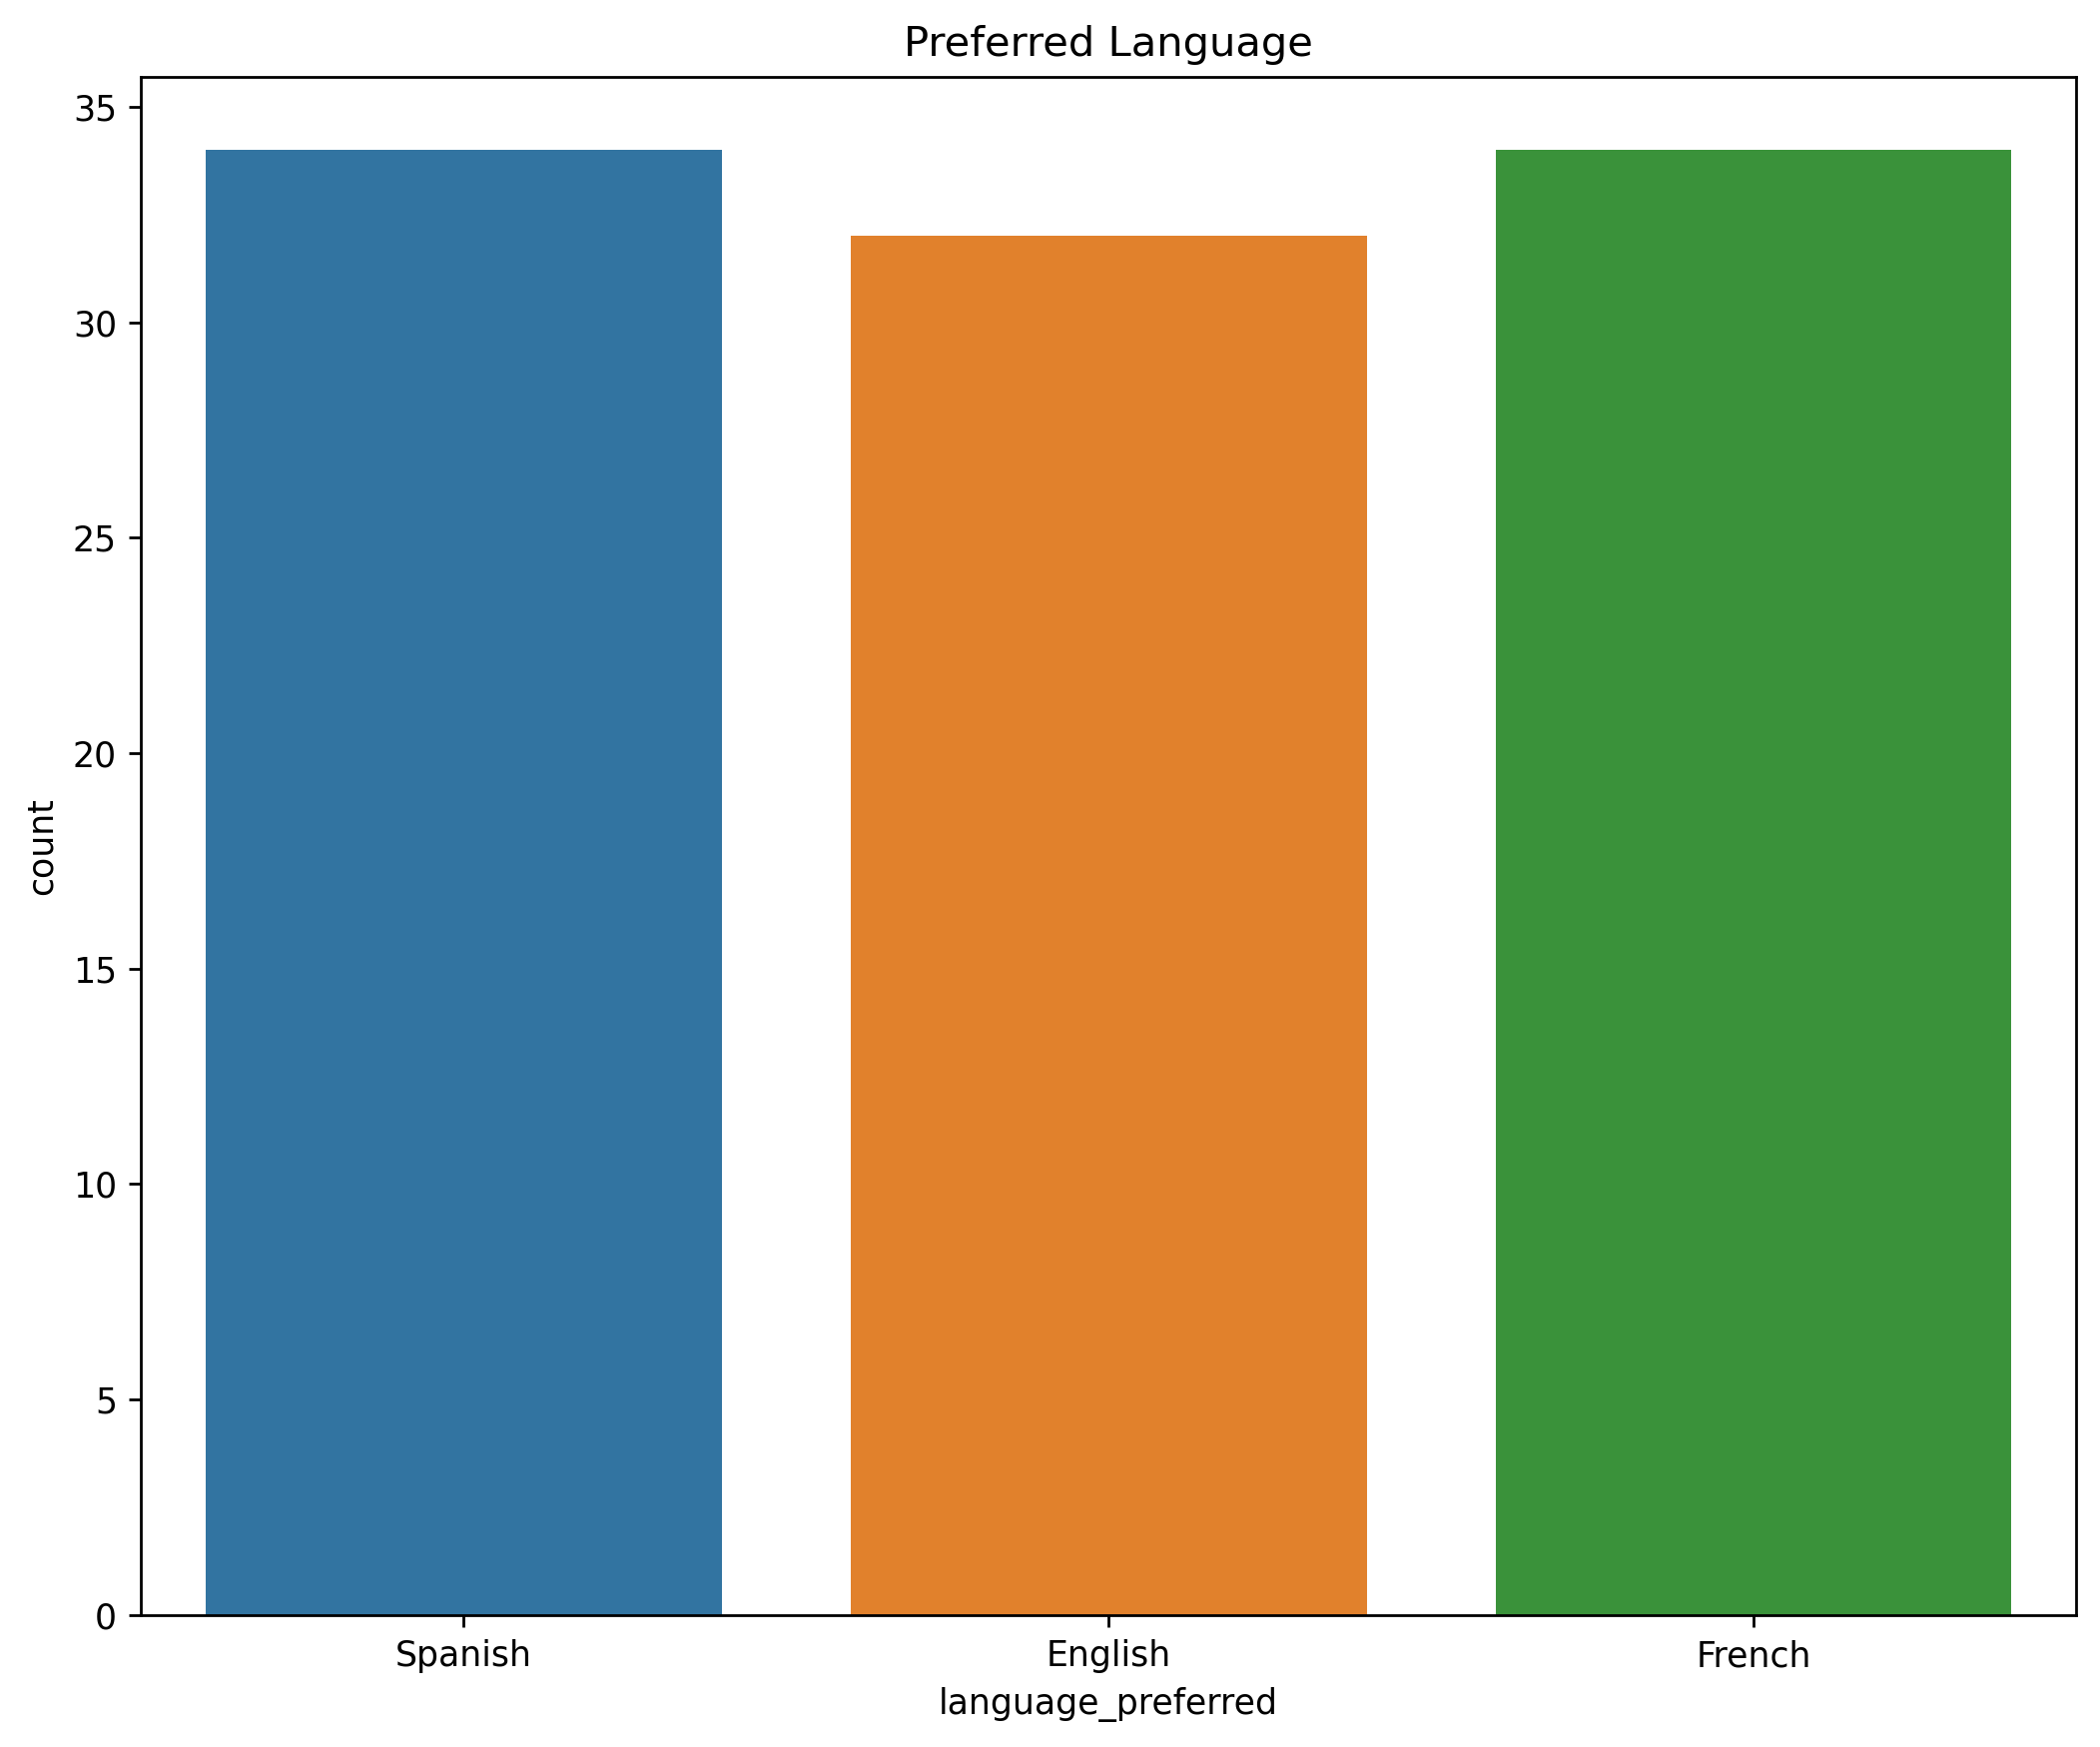

In [15]:
plt.figure(figsize=(10,8), dpi=250)
plt.title('Preferred Language')
sns.countplot(data=df, x='language_preferred');

### Bivariate Analysis

#### Landing Page vs Time Spent on Page

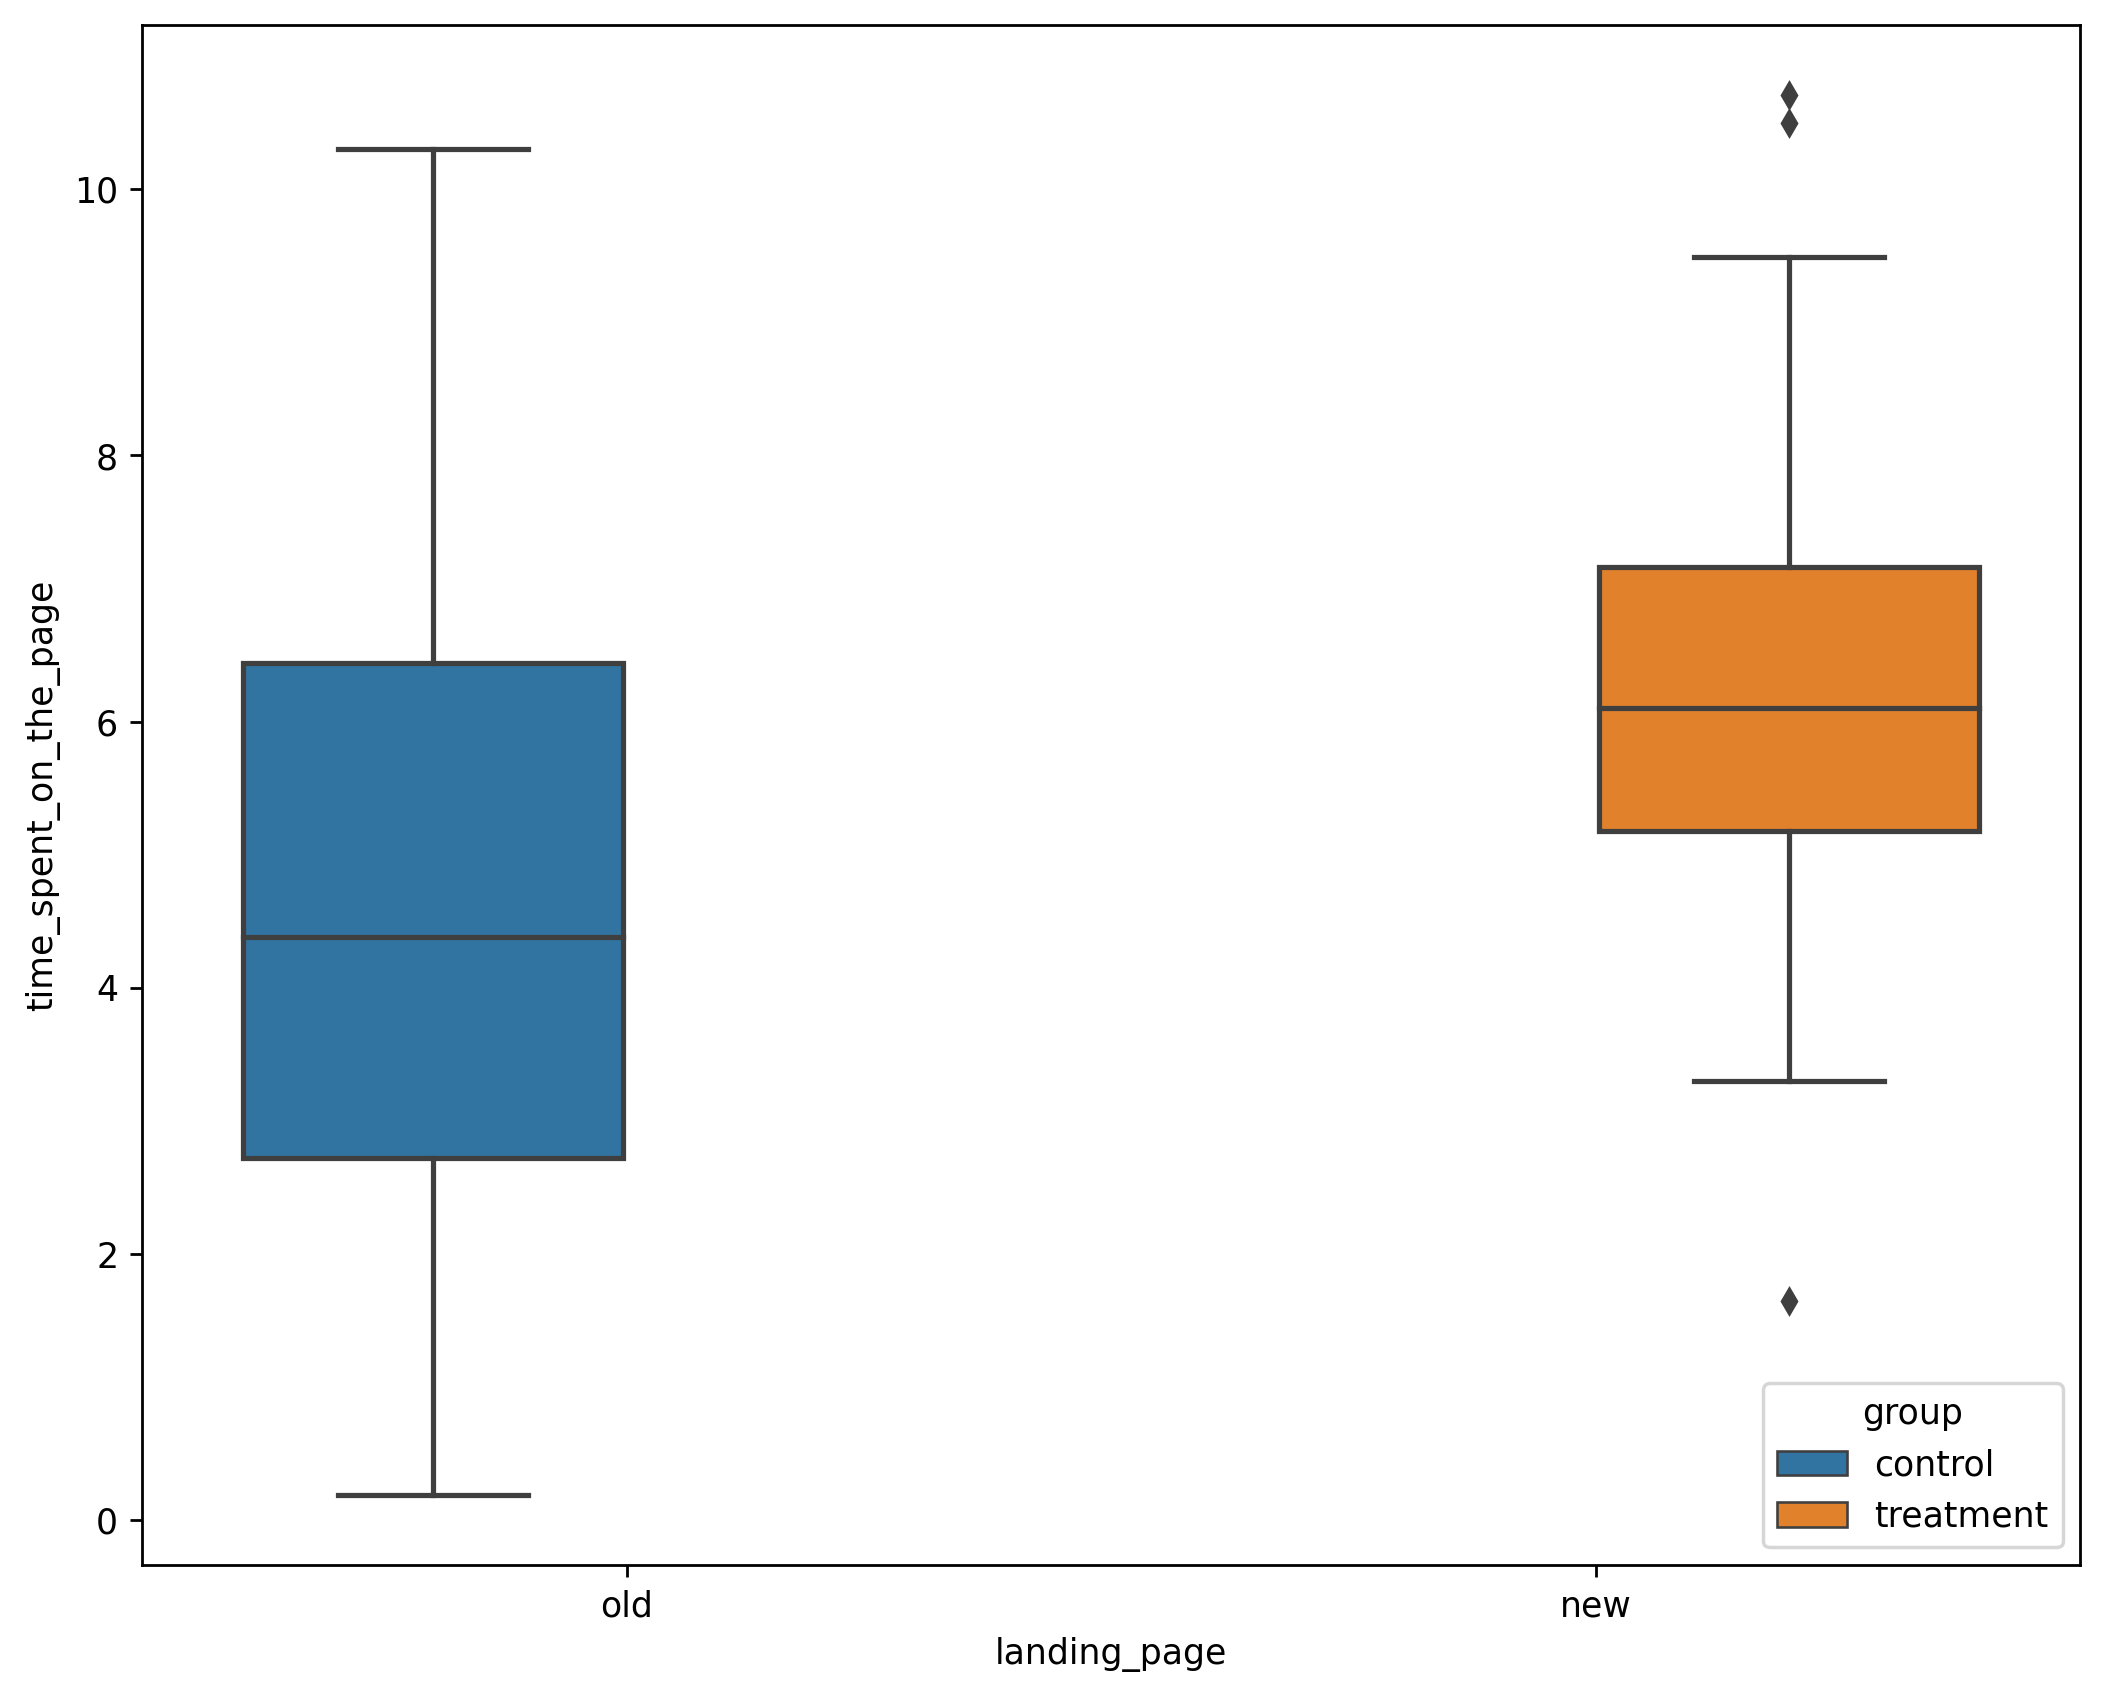

In [16]:
plt.figure(figsize=(10,8), dpi=250)
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='group');

#### Test Group vs Time Spent on Page

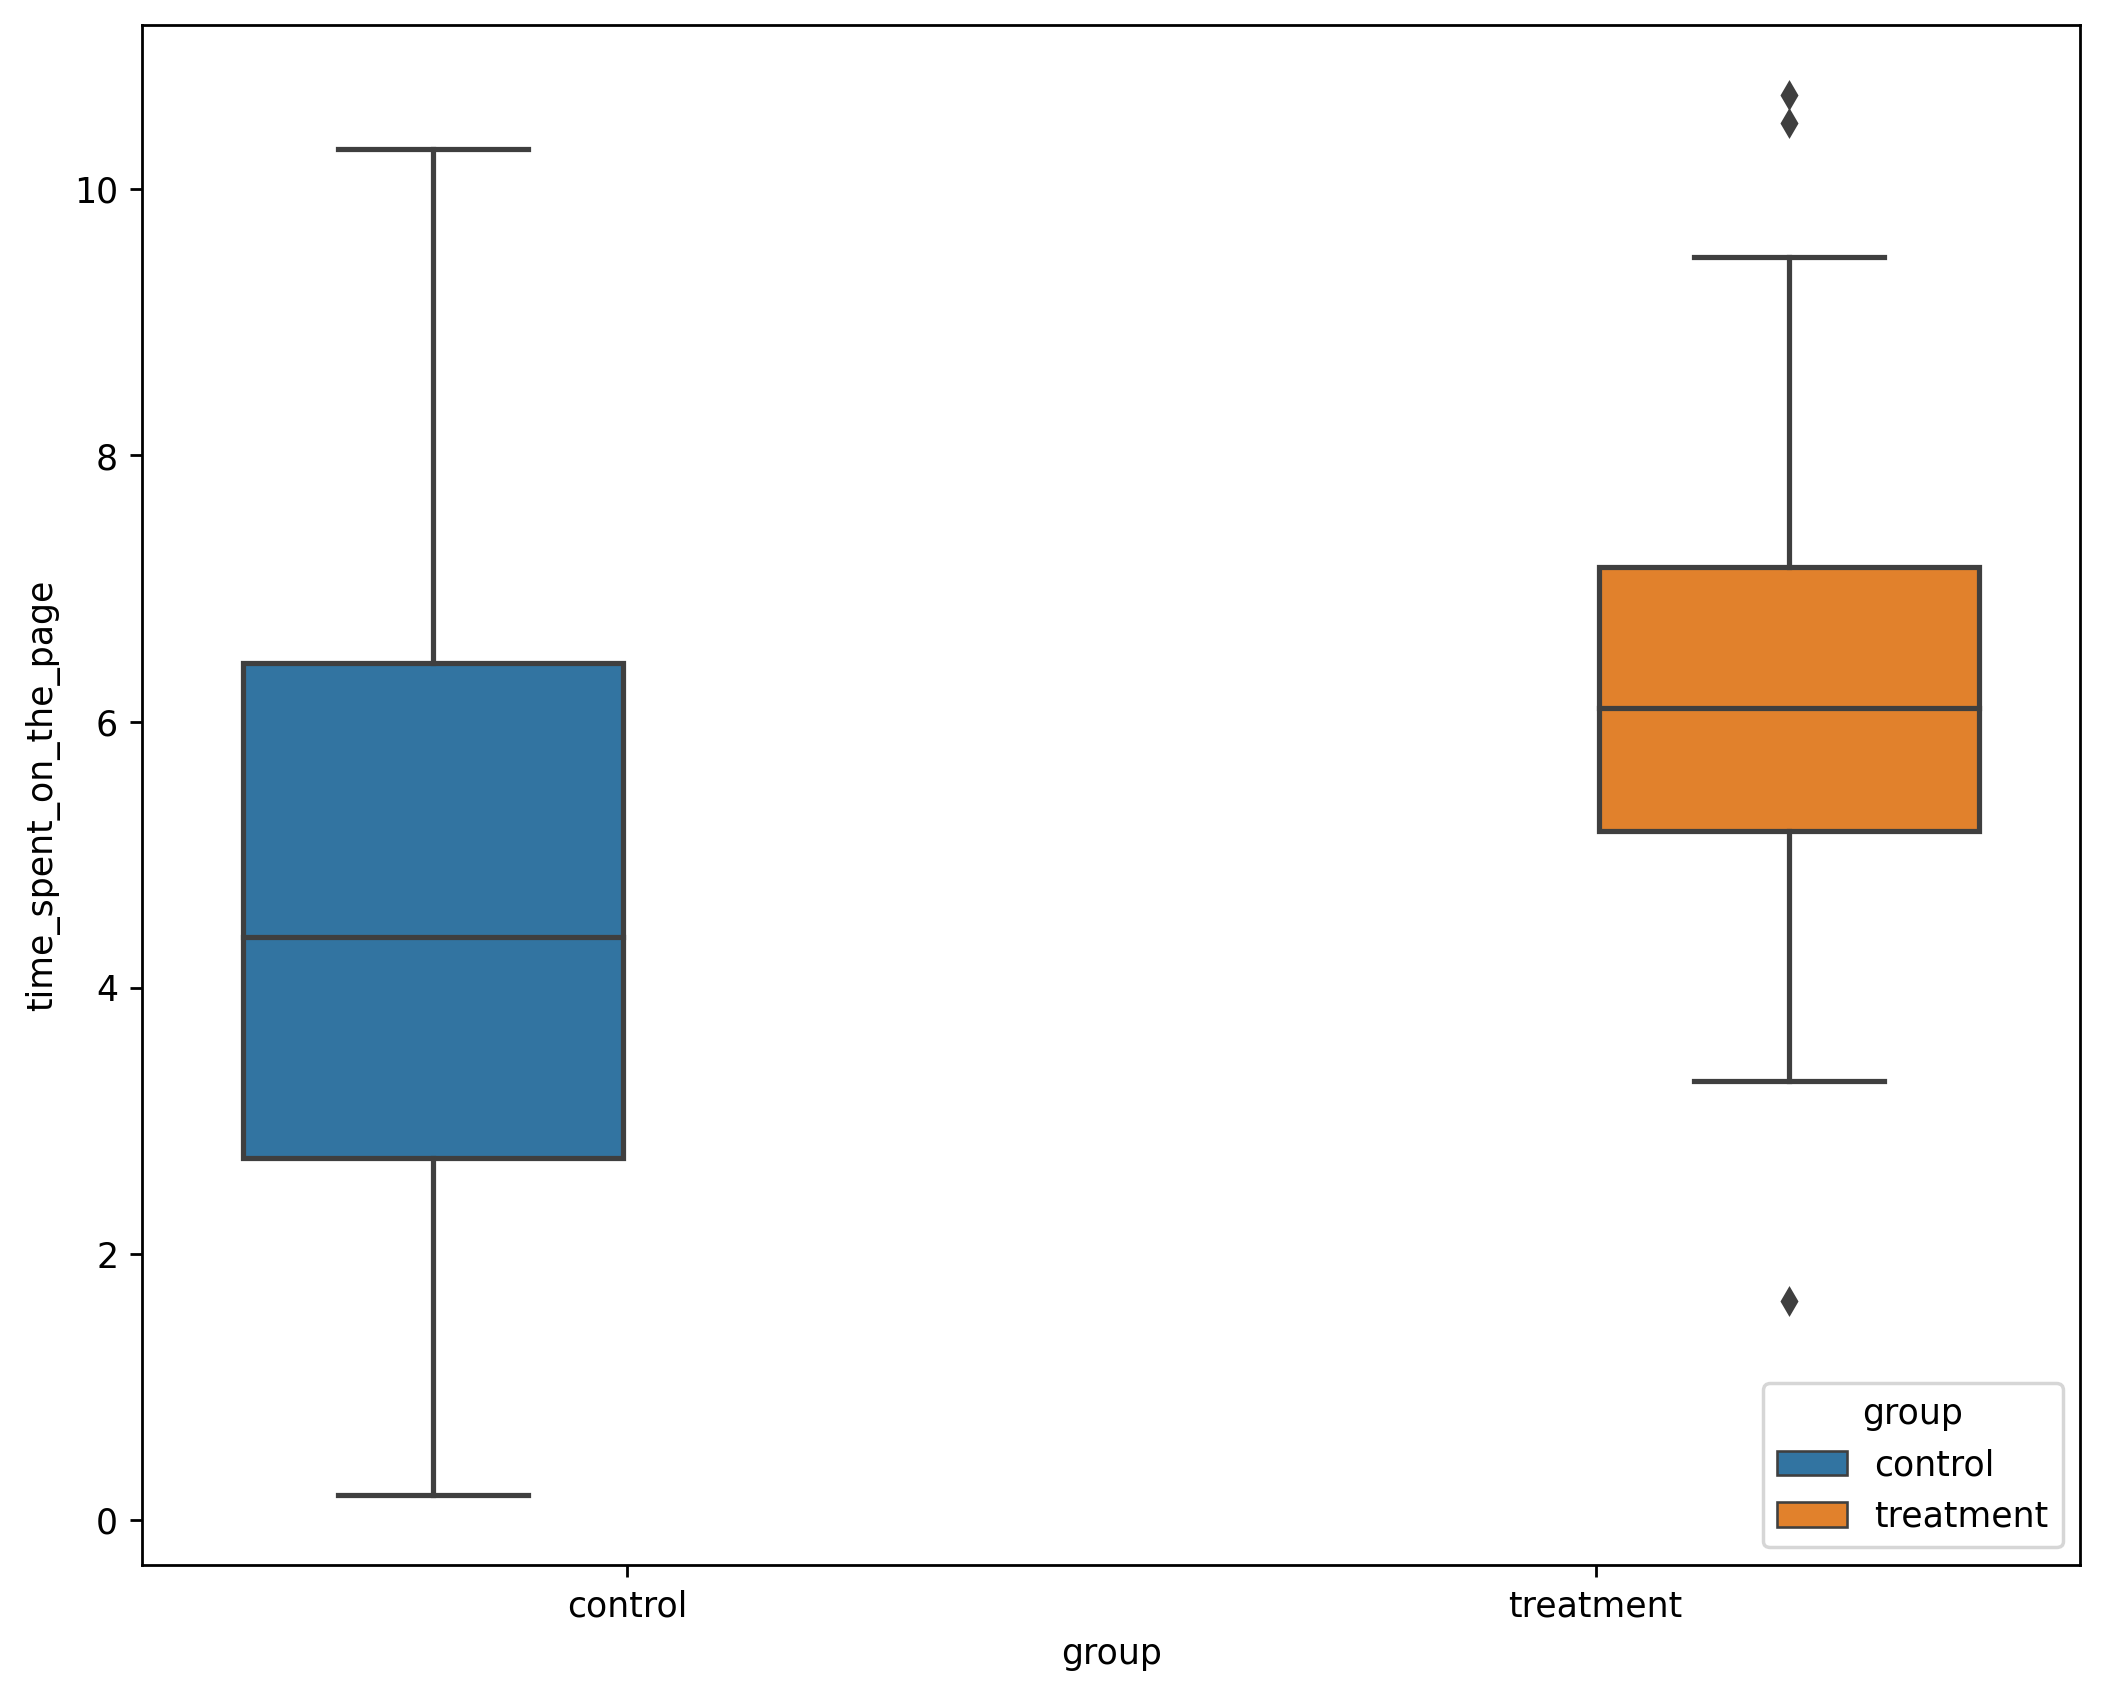

In [17]:
plt.figure(figsize=(10,8), dpi=250)
sns.boxplot(data=df, x='group', y='time_spent_on_the_page', hue='group');

#### Converted Status vs Time Spent on Page

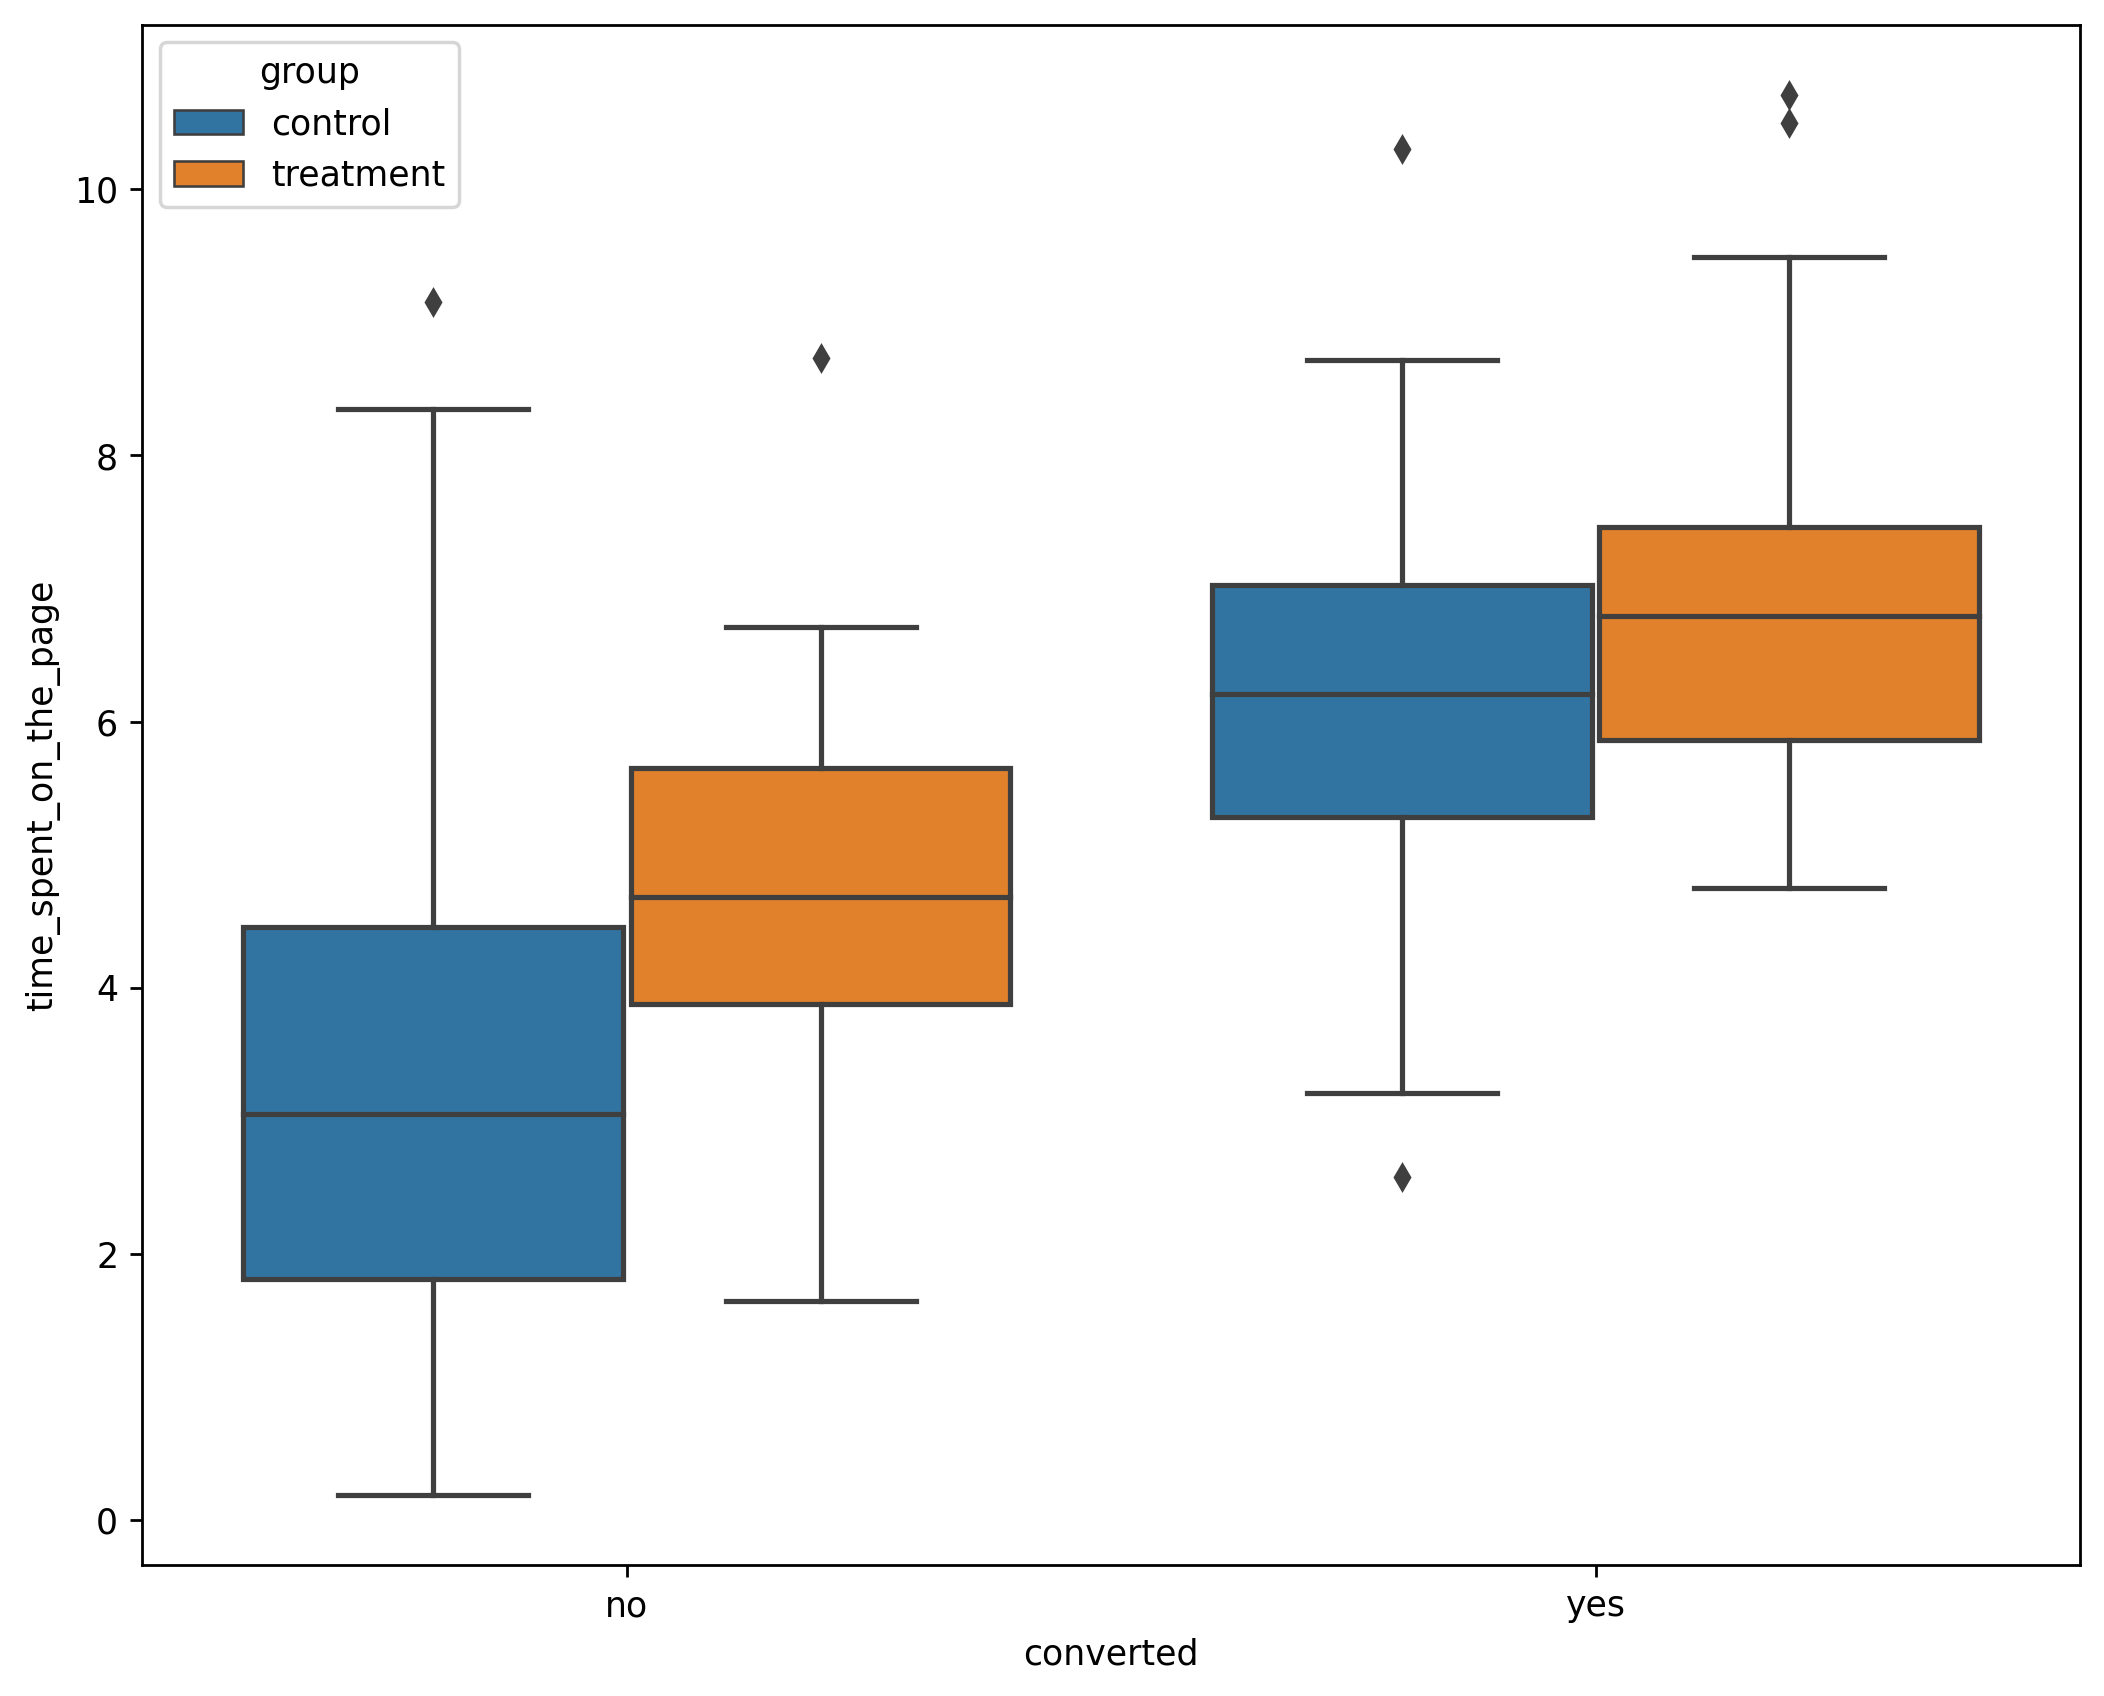

In [18]:
plt.figure(figsize=(10,8), dpi=250)
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='group');

#### Language vs Time Spent on Page

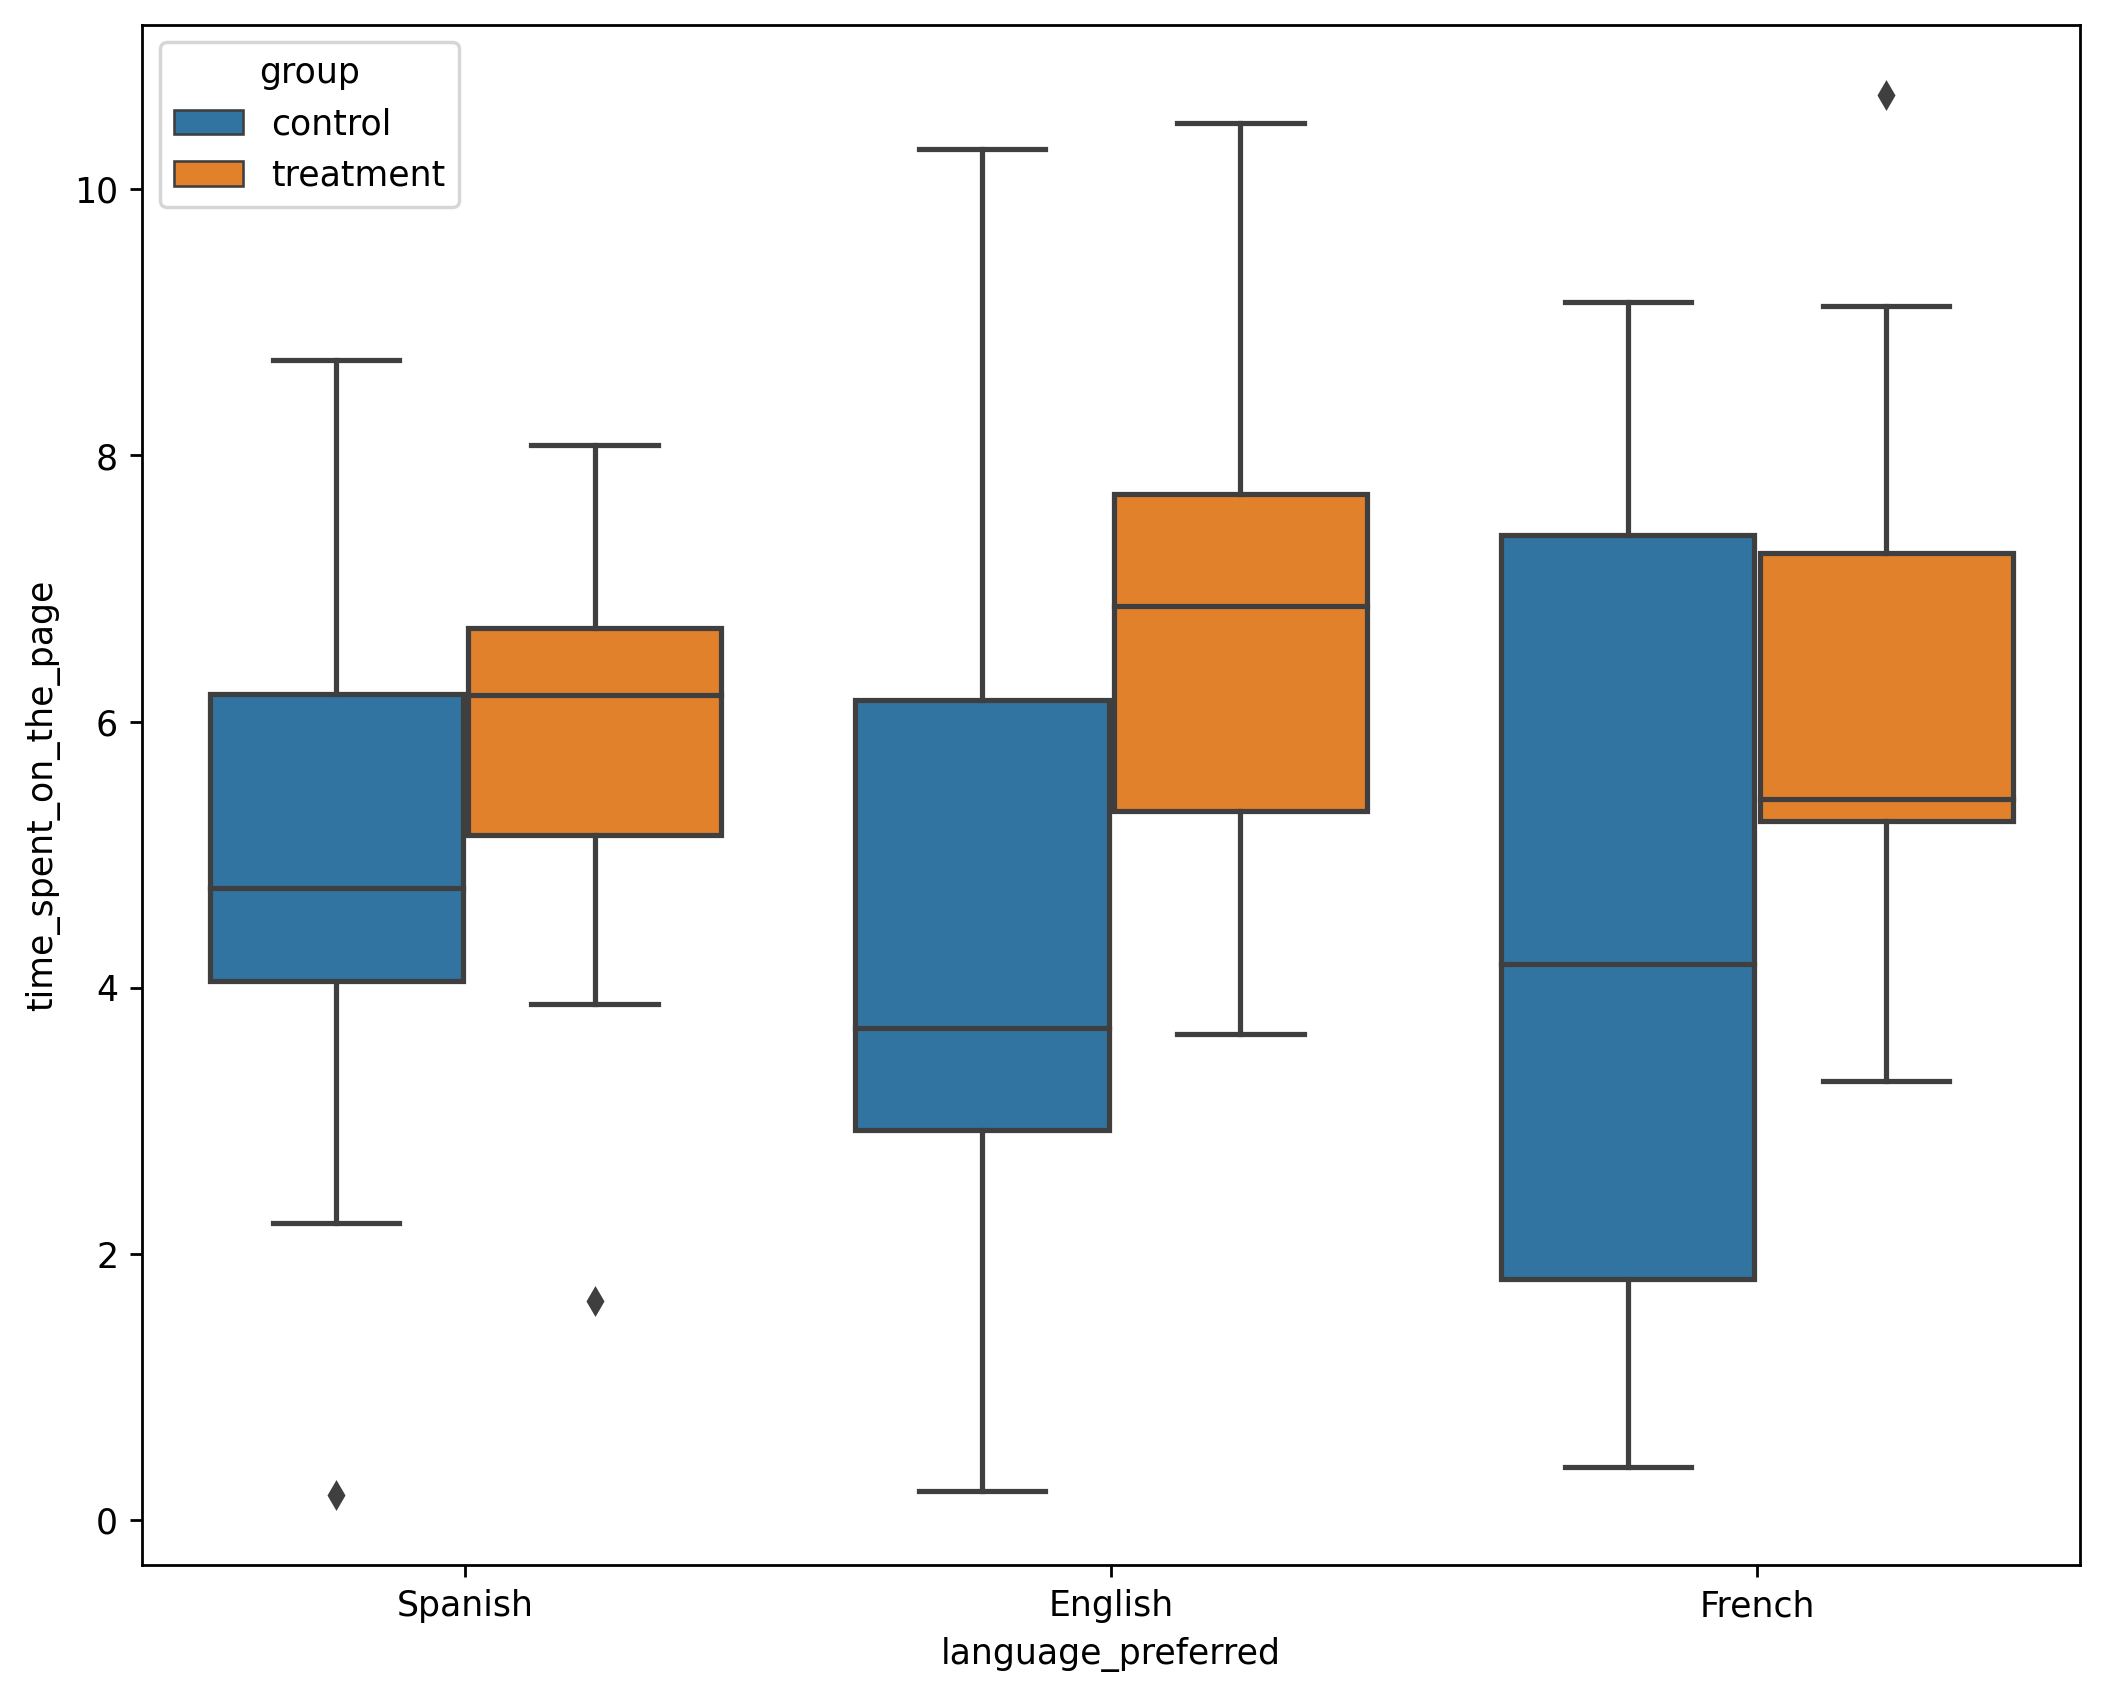

In [19]:
plt.figure(figsize=(10,8), dpi=250)
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='group');

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

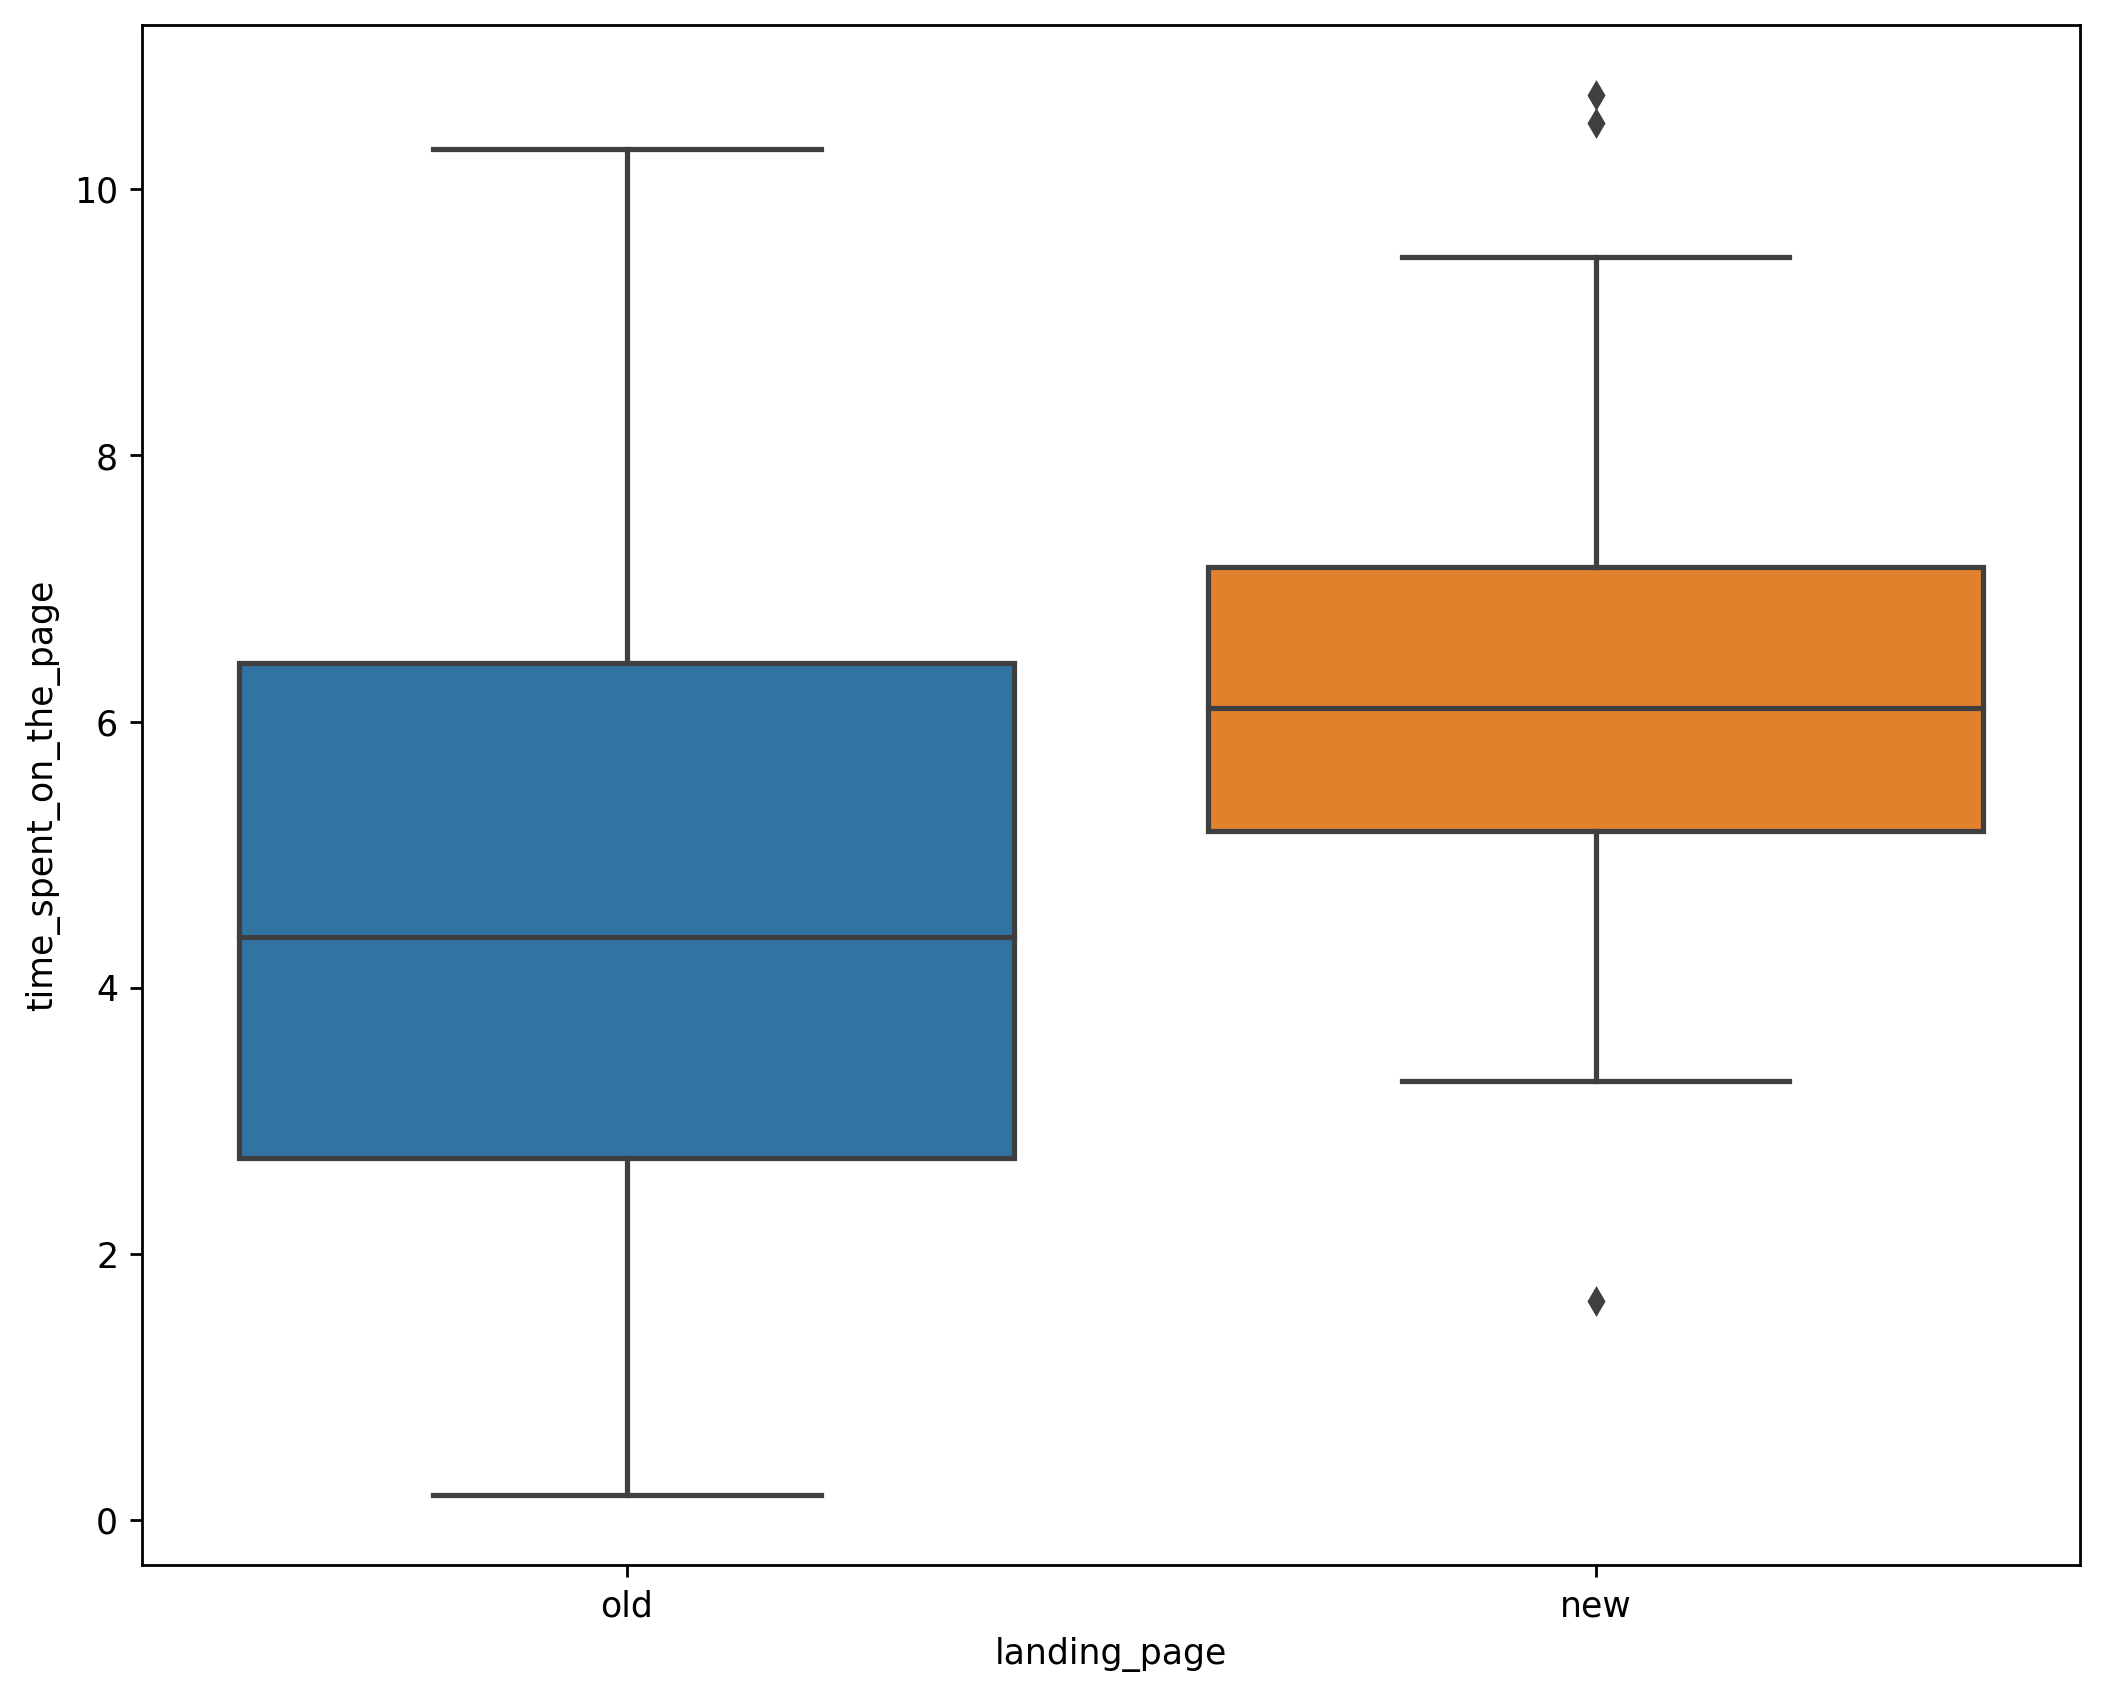

In [20]:
plt.figure(figsize=(10,8), dpi=250)
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')

### Step 1: Define the null and alternate hypotheses

Null Hypothesis - H$\omicron$ - $\mu$1 >= $\mu$2 

Alternate Hypothesis - Ha - $\mu$1 < $\mu$2 

Where $\mu$1 is the old langing page and $\mu$2 is the new landing page.

### Step 2: Select Appropriate test

A one-sided independent t-test (Two-sample t-test).

### Step 3: Decide the significance level

As per the job specification 0.05 will be used as the significance level. 

### Step 4: Collect and prepare data

In [21]:
# create a subset of data frame with time spent  for new landing page users 
time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create a subset of data frame with time spent for old landing page users
time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [22]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(time_old, time_new)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -3.7867702694199856
P-value: 0.000263224705619001


### Step 6: Compare the p-value with $\alpha$

In [23]:
alpha = 0.05  # 5% significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in time spent on the old and new landing pages.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in time spent on the old and new landing pages.")


Reject the null hypothesis: There is a significant difference in time spent on the old and new landing pages.


### Step 7:  Draw inference

Visitors are spending more time on the new landing page. 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

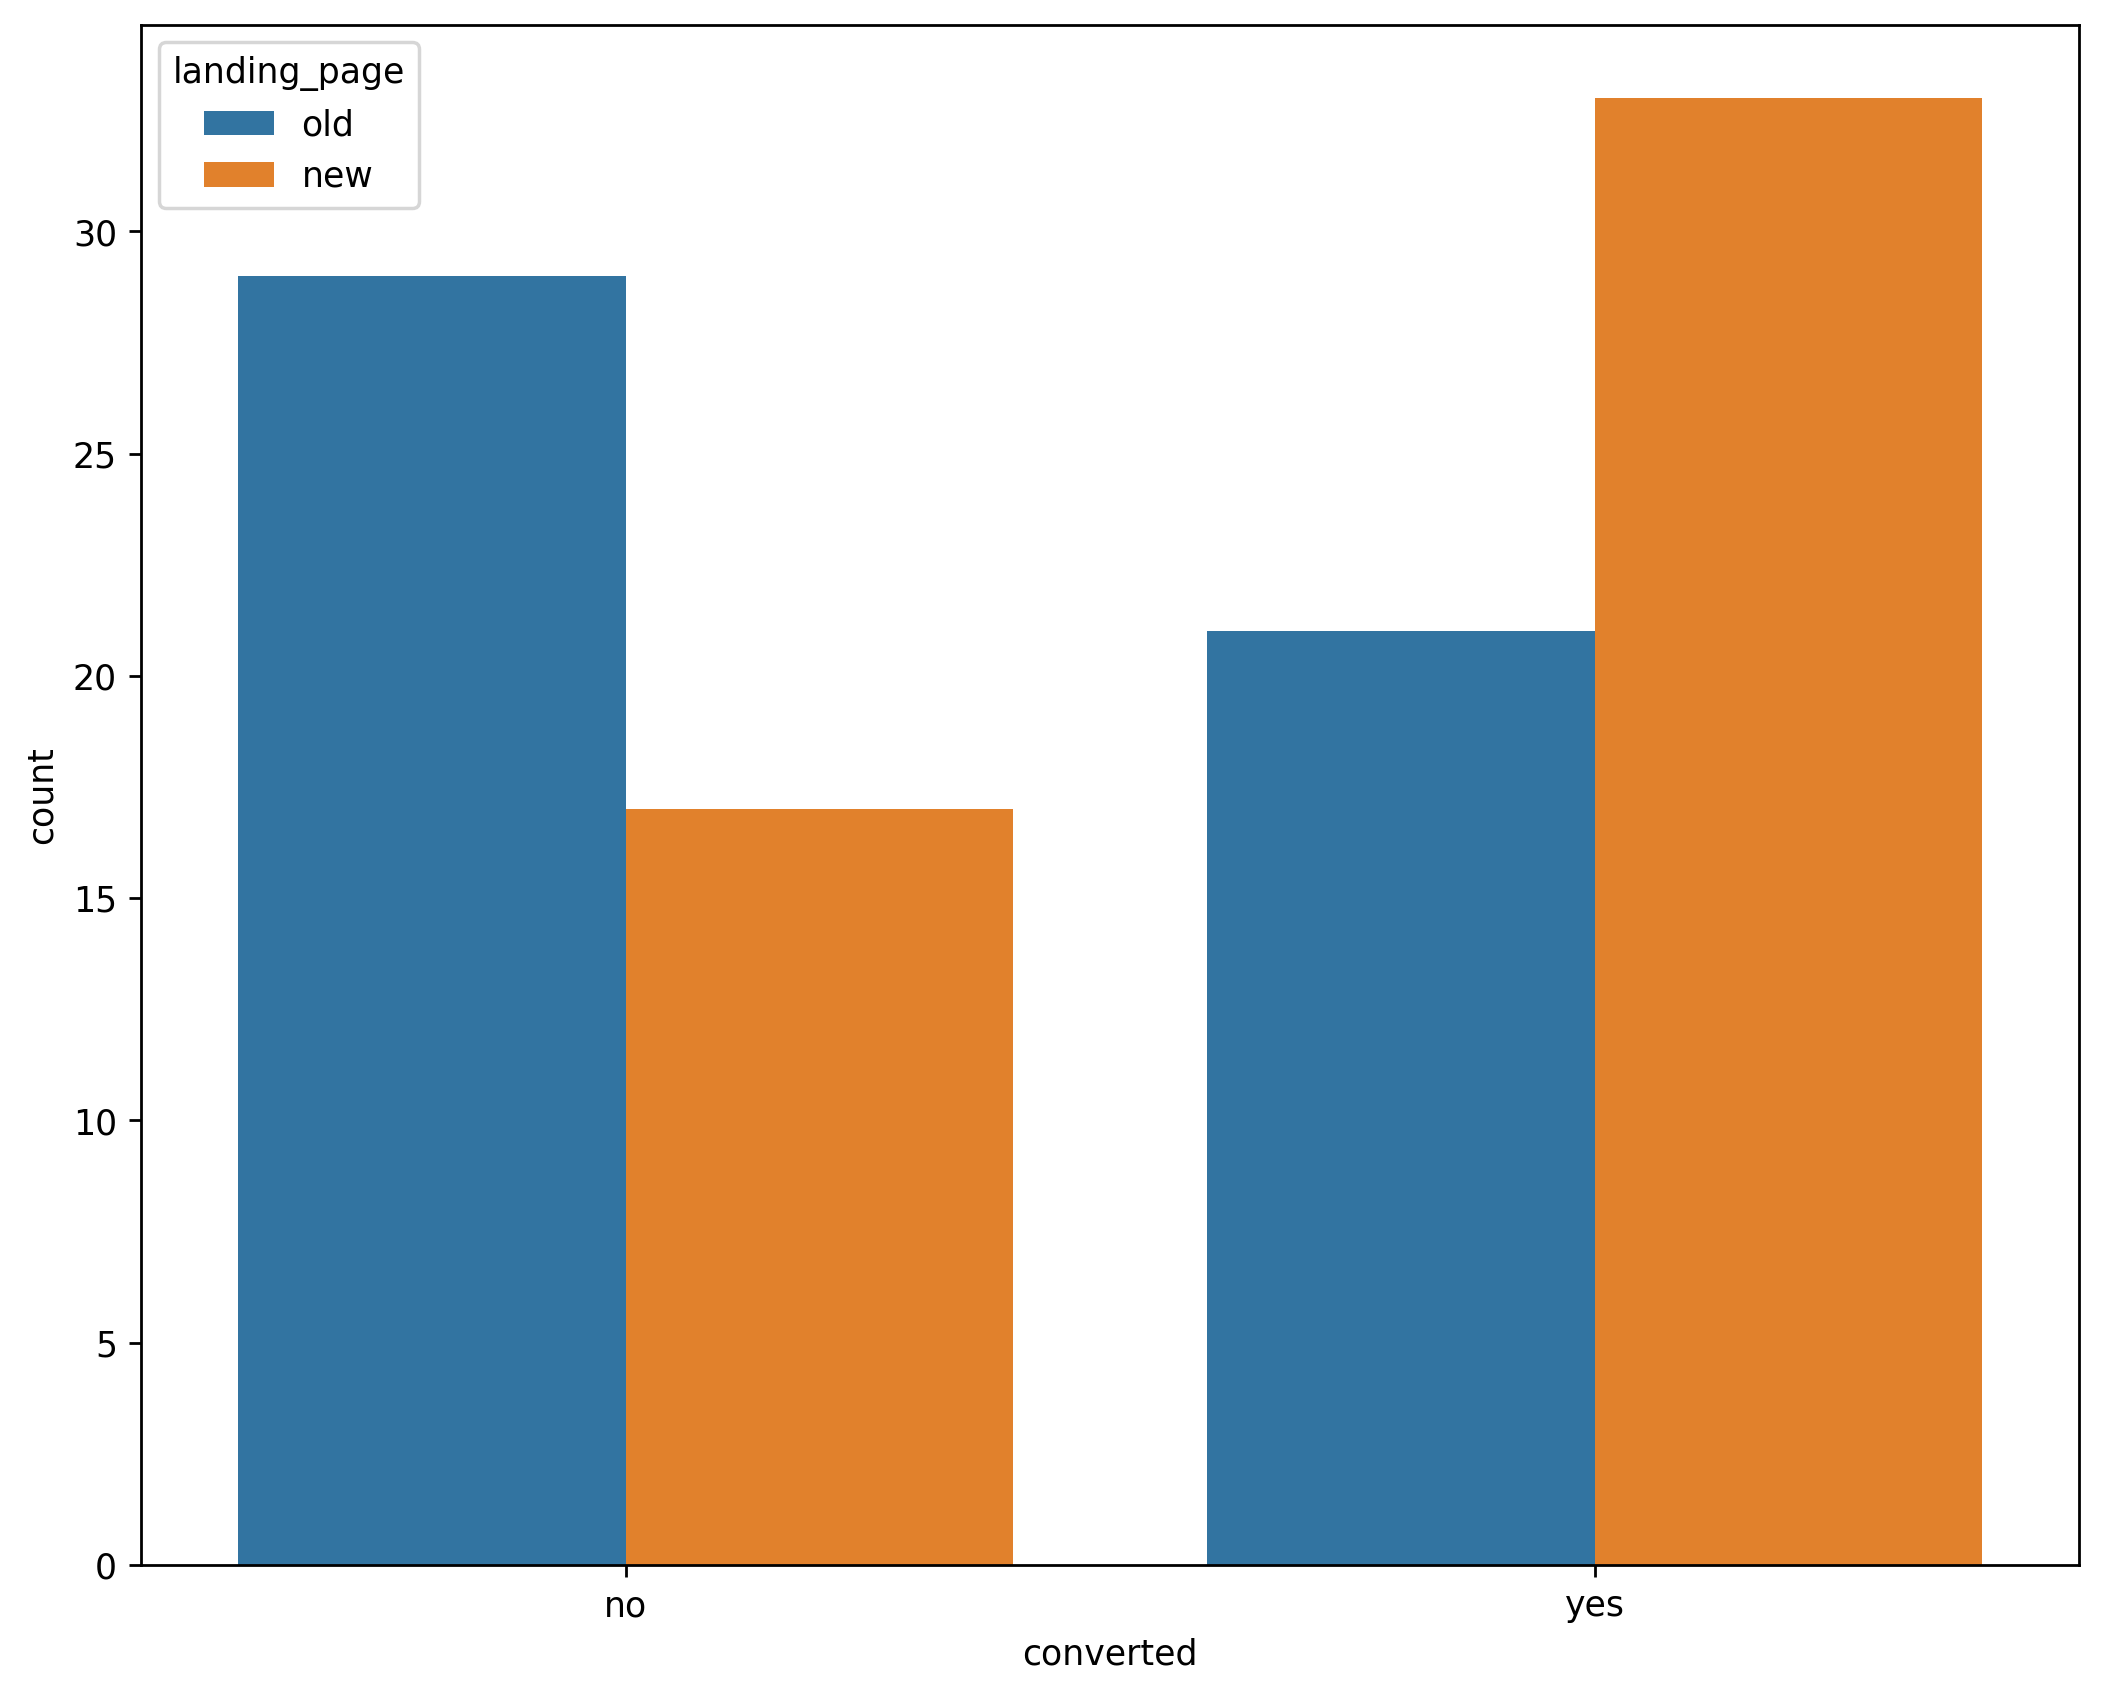

In [24]:
plt.figure(figsize=(10,8), dpi=250)
sns.countplot(data=df, x='converted', hue='landing_page');

### Step 1: Define the null and alternate hypotheses

Null Hypothesis - H$\omicron$ - $\mu$1 >= $\mu$2 

Alternate Hypothesis - Ha - $\mu$1 < $\mu$2 

Where $\mu$1 is convert from the old langing page and $\mu$2 is convert from the new landing page.

### Step 2: Select Appropriate test

two-sample proportion z-test

### Step 3: Decide the significance level

As per the job specification 0.05 will be used as the significance level.

### Step 4: Collect and prepare data

In [25]:
import math
from scipy.stats import norm

# Define sample sizes and conversion counts
n1 = 50  # sample size for old landing page
n2 = 50  # sample size for new landing page
x1 = 21  # conversions for old landing page
x2 = 32   # conversions for new landing page

### Step 5: Calculate Values and Compare

In [26]:
# Calculate the sample proportions
p1 = x1 / n1
p2 = x2 / n2

# Calculate the pooled proportion
p_pooled = (x1 + x2) / (n1 + n2)

# Calculate the standard error (SE)
SE = math.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))

# Calculate the z-value
z_value = (p1 - p2) / SE

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_value)))  # Two-tailed p-value

# Output the results
print(f"Old landing page conversion rate: {p1:.2f}")
print(f"New landing page conversion rate: {p2:.2f}")
print(f"Z-value: {z_value:.3f}")
print(f"P-value: {p_value:.3f}")

# Check if we reject or fail to reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")


Old landing page conversion rate: 0.42
New landing page conversion rate: 0.64
Z-value: -2.204
P-value: 0.028
Reject the null hypothesis: There is a significant difference in conversion rates.


### Step 6:  Draw inference

The new landing page is driving higer conversion rate. 

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

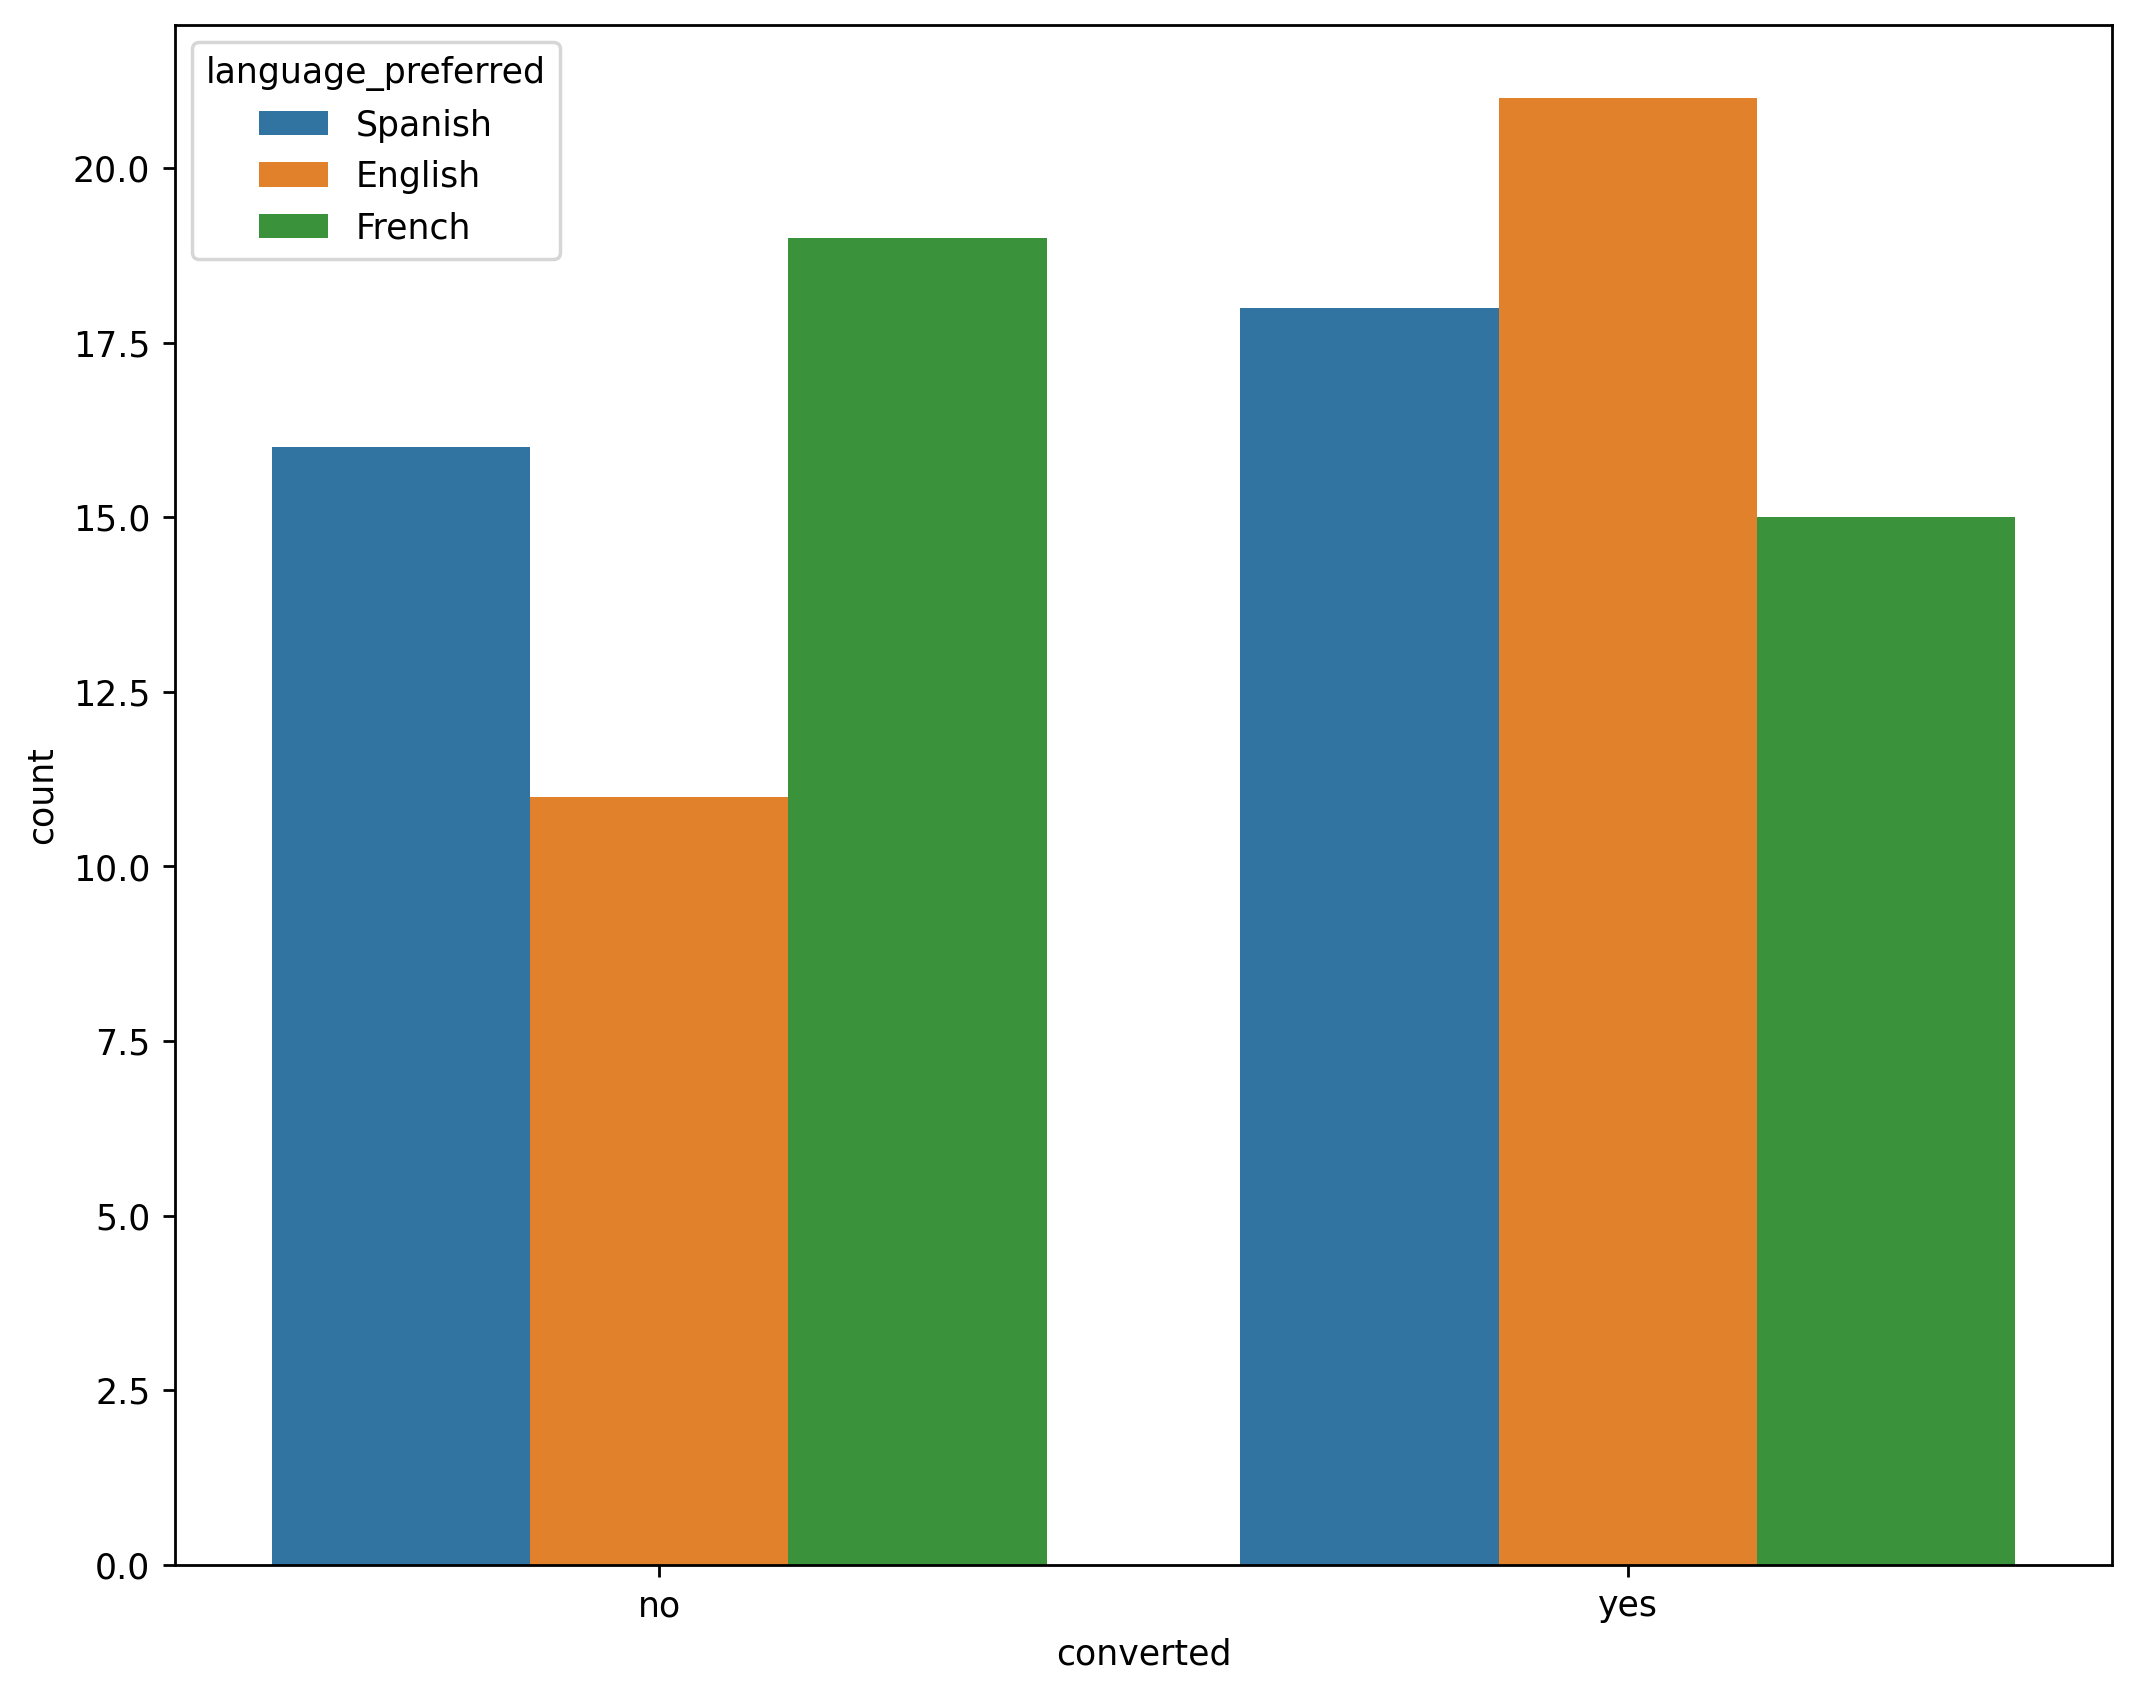

In [27]:
plt.figure(figsize=(10,8), dpi=250)
sns.countplot(data=df, x='converted', hue='language_preferred');

### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H₀): There is no significant relationship between the preferred language of the user and whether they convert.

Alternative Hypothesis (H₁): There is a significant relationship between the preferred language of the user and whether they convert.

### Step 2: Select Appropriate test

Chi-Square Test for Independence:

### Step 3: Decide the significance level

As per the job specification 0.05 will be used as the significance level.

### Step 4: Collect and prepare data

In [28]:
data = np.array([[21, 11], # english
                [18, 16], # spanish
                [15, 19]]) # french

df1 = pd.DataFrame(data, columns=["Converted", "Not Converted"], 
                  index=["English", "Spanish", "French"])

print("Observed Data Table:")
print(df1)

Observed Data Table:
         Converted  Not Converted
English         21             11
Spanish         18             16
French          15             19


## Step 5: Calculate Values and Compare

In [29]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(data)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:")
print(expected)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("\nWe reject the null hypothesis: There is a significant relationship between preferred language and conversion.")
else:
    print("\nWe fail to reject the null hypothesis: There is no significant relationship between preferred language and conversion.")



Chi-Square Test Results:
Chi2 Statistic: 3.0930306905370837
P-Value: 0.21298887487543447
Degrees of Freedom: 2
Expected Frequencies Table:
[[17.28 14.72]
 [18.36 15.64]
 [18.36 15.64]]

We fail to reject the null hypothesis: There is no significant relationship between preferred language and conversion.


### Step 6:  Draw inference

The language that a visitor preferres is not related to conversion rate.

## 4. Is the time spent on the new page same for the different language users?

### Step 1: Define the null and alternate hypotheses

H0 - μEnglish = μSpanish = μFrench

H1 - At least one of the group means is different

### Step 2: Select Appropriate test

one-way analysis of variance (ANOVA)

### Step 3: Decide the significance level

As per the job specification 0.05 will be used as the significance level.

### Step 4: Collect and prepare data

In [30]:
from scipy.stats import f_oneway

# perform one-way anova test
f_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))


The p-value is 0.8665610536012648


## Step 5: Compare

In [31]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the time spent across language groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the time spent across language groups.")

Fail to reject the null hypothesis: No significant difference in the time spent across language groups.


## Step 6:  Draw inference

There is a difference in the time spent on the landing page based on language

## Conclusion and Business Recommendations

#### Conclusions 
1. Users are spending more time on the new landing page. 
2. The new landing page is providing better conversion rates.
3. Language is not a factor in conversion rates.
4. Language is a factor on how long user stay on the landing page. The are spending less time on the landing page.

#### Recommendations
1. Fully employ the new landing page and remove the old landing page. 
2. More research into why user who prefer French are spending less time on the landing page. 
3. Other data points such as age and gender should be included in the data set. 


___